# Longitudinal analysis of asymmetry index
Črt Rozman <br>
October 2024 <br>
In this file I will do longitudinal analysis of asymmetry index (AI). I want to look at trajectories of AI during different timepoints, for NC, MCI, demented and transition patients(those whose cognition status declined over time). I want to look at AI for whole brain region and also individual regions, such as frontal lobe, temporal lobe and hippocampus. 

In [1]:
# Import necessary libraries
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [2]:
# importing functions from "AI_longitudinal_functions.py"
from AI_longitudinal_functions import *

In [3]:
dataPath = '../../NACC_data/AI_longitudinal/'
savePath = '../results/AI_longitudinal/'

In [4]:
# paths to preprocessed and sorted cohorts 
ncPath = '../../NACC_data/sorted_preprocessed_cohorts/NC/'
mciPath = '../../NACC_data/sorted_preprocessed_cohorts/MCI/'
alzdPath = '../../NACC_data/sorted_preprocessed_cohorts/ALZD/'
transPath = '../../NACC_data/sorted_preprocessed_cohorts/TRANS/'

In [5]:
ncPath = os.path.abspath(ncPath)
mciPath = os.path.abspath(mciPath)
alzdPath = os.path.abspath(alzdPath)
transPath = os.path.abspath(transPath)

# Modify the absolute path for long path support on Windows
if os.name == 'nt':                     # Check if the operating system is Windows
    ncPath = '\\\\?\\' + ncPath
    mciPath = '\\\\?\\' + mciPath
    alzdPath = '\\\\?\\' + alzdPath
    transPath = '\\\\?\\' + transPath

In [6]:
# paths to .csv files that store information about patients' scans. 
csv_ncPath = "../../NACC_data/sorted_preprocessed_cohorts/0csv/nc.csv"
csv_mciPath = "../../NACC_data/sorted_preprocessed_cohorts/0csv/mci.csv"
csv_alzdPath = "../../NACC_data/sorted_preprocessed_cohorts/0csv/alzd.csv"
csv_transPath = "../../NACC_data/sorted_preprocessed_cohorts/0csv/trans.csv"

In [7]:
# mask path
maskPath = 'C:/Users/Crt/Documents/WIMR/asymmetryAD/UW_data/AAL3+pons/'

Loading the dictionary that stored NACCID as keys and all the .nii files that correspond to that NACCID, separately for FSPGR and MPRAGE.

In [8]:
# nc_wbet_fspgr = filepaths_dictionary(ncPath, csv_ncPath)[0]
# nc_wbet_mprage = filepaths_dictionary(ncPath, csv_ncPath)[1]

# mci_wbet_fspgr = filepaths_dictionary(mciPath, csv_mciPath)[0]
# mci_wbet_mprage = filepaths_dictionary(mciPath, csv_mciPath)[1]

# alzd_wbet_fspgr = filepaths_dictionary(alzdPath, csv_alzdPath)[0]
# alzd_wbet_mprage = filepaths_dictionary(alzdPath, csv_alzdPath)[1]

# trans_wbet_fspgr = filepaths_dictionary(transPath, csv_transPath)[0]
# trans_wbet_mprage = filepaths_dictionary(transPath, csv_transPath)[1]

Flattening and normalizing the data.

In [9]:
# nc_fspgr_data = flatten_and_normalize_across_all(nc_wbet_fspgr)
# nc_mprage_data = flatten_and_normalize_across_all(nc_wbet_mprage)

# mci_fspgr_data = flatten_and_normalize_across_all(mci_wbet_fspgr)
# mci_mprage_data = flatten_and_normalize_across_all(mci_wbet_mprage)

# alzd_fspgr_data = flatten_and_normalize_across_all(alzd_wbet_fspgr)
# alzd_mprage_data = flatten_and_normalize_across_all(alzd_wbet_mprage)

# trans_fspgr_data = flatten_and_normalize_across_all(trans_wbet_fspgr)
# trans_mprage_data = flatten_and_normalize_across_all(trans_wbet_mprage)

!!WITHOUT NORMALIZATION!!

In [10]:
# nc_fspgr_data = flatten(nc_wbet_fspgr)
# nc_mprage_data = flatten(nc_wbet_mprage)

# mci_fspgr_data = flatten(mci_wbet_fspgr)
# mci_mprage_data = flatten(mci_wbet_mprage)

# alzd_fspgr_data = flatten(alzd_wbet_fspgr)
# alzd_mprage_data = flatten(alzd_wbet_mprage)

# trans_fspgr_data = flatten(trans_wbet_fspgr)
# trans_mprage_data = flatten(trans_wbet_mprage)

Saving this data, since it takes a lot of time to run the code.

In [11]:
# np.savez_compressed(dataPath+'nc_fspgr_data.npz', **nc_fspgr_data)
# np.savez_compressed(dataPath+'nc_mprage_data.npz', **nc_mprage_data)
# np.savez_compressed(dataPath+'mci_fspgr_data.npz', **mci_fspgr_data)
# np.savez_compressed(dataPath+'mci_mprage_data.npz', **mci_mprage_data)
# np.savez_compressed(dataPath+'alzd_fspgr_data.npz', **alzd_fspgr_data)
# np.savez_compressed(dataPath+'alzd_mprage_data.npz', **alzd_mprage_data)
# np.savez_compressed(dataPath+'trans_fspgr_data.npz', **trans_fspgr_data)
# np.savez_compressed(dataPath+'trans_mprage_data.npz', **trans_mprage_data)

!!WITHOUT NORMALIZATION!!

In [12]:
# np.savez_compressed(dataPath+'retry/nc_fspgr_data.npz', **nc_fspgr_data)
# np.savez_compressed(dataPath+'retry/nc_mprage_data.npz', **nc_mprage_data)
# np.savez_compressed(dataPath+'retry/mci_fspgr_data.npz', **mci_fspgr_data)
# np.savez_compressed(dataPath+'retry/mci_mprage_data.npz', **mci_mprage_data)
# np.savez_compressed(dataPath+'retry/alzd_fspgr_data.npz', **alzd_fspgr_data)
# np.savez_compressed(dataPath+'retry/alzd_mprage_data.npz', **alzd_mprage_data)
# np.savez_compressed(dataPath+'retry/trans_fspgr_data.npz', **trans_fspgr_data)
# np.savez_compressed(dataPath+'retry/trans_mprage_data.npz', **trans_mprage_data)

Loading the saved results.

In [8]:
def load_npz_file(filename):
    with np.load(filename) as data:
        return {key: data[key] for key in data}

In [14]:
# nc_fspgr_data = load_npz_file(dataPath+'nc_fspgr_data.npz')
# nc_mprage_data = load_npz_file(dataPath+'nc_mprage_data.npz')

# mci_fspgr_data = load_npz_file(dataPath+'mci_fspgr_data.npz')
# mci_mprage_data = load_npz_file(dataPath+'mci_mprage_data.npz')

# alzd_fspgr_data = load_npz_file(dataPath+'alzd_fspgr_data.npz')
# alzd_mprage_data = load_npz_file(dataPath+'alzd_mprage_data.npz')

# trans_fspgr_data = load_npz_file(dataPath+'trans_fspgr_data.npz')
# trans_mprage_data = load_npz_file(dataPath+'trans_mprage_data.npz')

!!WITHOUT NORMALIZATION!!

In [ ]:
# nc_fspgr_data = load_npz_file(dataPath+'retry/nc_fspgr_data.npz')
# nc_mprage_data = load_npz_file(dataPath+'retry/nc_mprage_data.npz')

# mci_fspgr_data = load_npz_file(dataPath+'retry/mci_fspgr_data.npz')
# mci_mprage_data = load_npz_file(dataPath+'retry/mci_mprage_data.npz')

# alzd_fspgr_data = load_npz_file(dataPath+'retry/alzd_fspgr_data.npz')
# alzd_mprage_data = load_npz_file(dataPath+'retry/alzd_mprage_data.npz')

# trans_fspgr_data = load_npz_file(dataPath+'retry/trans_fspgr_data.npz')
# trans_mprage_data = load_npz_file(dataPath+'retry/trans_mprage_data.npz')

Getting mask by hemispheres.

In [9]:
left_hemisphere_mask = mask_hemispheres(maskPath + 'AAL3+pons.nii', maskPath + 'AAL3+pons.txt', flatten=True)[0]
right_hemisphere_mask = mask_hemispheres(maskPath + 'AAL3+pons.nii', maskPath + 'AAL3+pons.txt', flatten=True)[1]

Getting mask by regions.

In [10]:
mask_L_frontal_lobe = mask_regions(maskPath, flatten=True)[0]
mask_R_frontal_lobe = mask_regions(maskPath, flatten=True)[1]
mask_L_temporal_lobe = mask_regions(maskPath, flatten=True)[2]
mask_R_temporal_lobe = mask_regions(maskPath, flatten=True)[3]
mask_L_hippocampus = mask_regions(maskPath, flatten=True)[4]
mask_R_hippocampus = mask_regions(maskPath, flatten=True)[5]

### Calculating the time of scan since baseline (first scan)

In [11]:
nc_scan_times = time_from_baseline(csv_ncPath)
mci_scan_times = time_from_baseline(csv_mciPath)
alzd_scan_times = time_from_baseline(csv_alzdPath)
trans_scan_times = time_from_baseline(csv_transPath)

### Calculating the AI of whole brain and regions
In this section I use function calculate_AI and save the results, then load them again later. That way there is no need to calculate everything everytime you run the script. (commented since it only needs to run once)

In [ ]:
# AI_nc_fspgr_whole = calculate_AI(nc_fspgr_data, left_hemisphere_mask, right_hemisphere_mask)
# AI_nc_mprage_whole = calculate_AI(nc_mprage_data, left_hemisphere_mask, right_hemisphere_mask)

# AI_mci_fspgr_whole = calculate_AI(mci_fspgr_data, left_hemisphere_mask, right_hemisphere_mask)
# AI_mci_mprage_whole = calculate_AI(mci_mprage_data, left_hemisphere_mask, right_hemisphere_mask)

# AI_alzd_fspgr_whole = calculate_AI(alzd_fspgr_data, left_hemisphere_mask, right_hemisphere_mask)
# AI_alzd_mprage_whole = calculate_AI(alzd_mprage_data, left_hemisphere_mask, right_hemisphere_mask)

# AI_trans_fspgr_whole = calculate_AI(trans_fspgr_data, left_hemisphere_mask, right_hemisphere_mask)
# AI_trans_mprage_whole = calculate_AI(trans_mprage_data, left_hemisphere_mask, right_hemisphere_mask)

In [ ]:
# np.savez_compressed(dataPath+'AI_nc_fspgr_whole.npz', **AI_nc_fspgr_whole)
# np.savez_compressed(dataPath+'AI_nc_mprage_whole.npz', **AI_nc_mprage_whole)
# np.savez_compressed(dataPath+'AI_mci_fspgr_whole.npz', **AI_mci_fspgr_whole)
# np.savez_compressed(dataPath+'AI_mci_mprage_whole.npz', **AI_mci_mprage_whole)
# np.savez_compressed(dataPath+'AI_alzd_fspgr_whole.npz', **AI_alzd_fspgr_whole)
# np.savez_compressed(dataPath+'AI_alzd_mprage_whole.npz', **AI_alzd_mprage_whole)
# np.savez_compressed(dataPath+'AI_trans_fspgr_whole.npz', **AI_trans_fspgr_whole)
# np.savez_compressed(dataPath+'AI_trans_mprage_whole.npz', **AI_trans_mprage_whole)

!!WITHOUT NORMALIZATION!!

In [ ]:
# np.savez_compressed(dataPath+'retry/AI_nc_fspgr_whole.npz', **AI_nc_fspgr_whole)
# np.savez_compressed(dataPath+'retry/AI_nc_mprage_whole.npz', **AI_nc_mprage_whole)
# np.savez_compressed(dataPath+'retry/AI_mci_fspgr_whole.npz', **AI_mci_fspgr_whole)
# np.savez_compressed(dataPath+'retry/AI_mci_mprage_whole.npz', **AI_mci_mprage_whole)
# np.savez_compressed(dataPath+'retry/AI_alzd_fspgr_whole.npz', **AI_alzd_fspgr_whole)
# np.savez_compressed(dataPath+'retry/AI_alzd_mprage_whole.npz', **AI_alzd_mprage_whole)
# np.savez_compressed(dataPath+'retry/AI_trans_fspgr_whole.npz', **AI_trans_fspgr_whole)
# np.savez_compressed(dataPath+'retry/AI_trans_mprage_whole.npz', **AI_trans_mprage_whole)

Calculating AI by regions. 

In [ ]:
# AI_nc_fspgr_frontal_lobe = calculate_AI(nc_fspgr_data, mask_L_frontal_lobe, mask_R_frontal_lobe)
# AI_nc_mprage_frontal_lobe = calculate_AI(nc_mprage_data, mask_L_frontal_lobe, mask_R_frontal_lobe)

# AI_mci_fspgr_frontal_lobe = calculate_AI(mci_fspgr_data, mask_L_frontal_lobe, mask_R_frontal_lobe)
# AI_mci_mprage_frontal_lobe = calculate_AI(mci_mprage_data, mask_L_frontal_lobe, mask_R_frontal_lobe)

# AI_alzd_fspgr_frontal_lobe = calculate_AI(alzd_fspgr_data, mask_L_frontal_lobe, mask_R_frontal_lobe)
# AI_alzd_mprage_frontal_lobe = calculate_AI(alzd_mprage_data, mask_L_frontal_lobe, mask_R_frontal_lobe)

# AI_trans_fspgr_frontal_lobe = calculate_AI(trans_fspgr_data, mask_L_frontal_lobe, mask_R_frontal_lobe)
# AI_trans_mprage_frontal_lobe = calculate_AI(trans_mprage_data, mask_L_frontal_lobe, mask_R_frontal_lobe)

In [ ]:
# np.savez_compressed(dataPath+'AI_nc_fspgr_frontal_lobe.npz', **AI_nc_fspgr_frontal_lobe)
# np.savez_compressed(dataPath+'AI_nc_mprage_frontal_lobe.npz', **AI_nc_mprage_frontal_lobe)
# np.savez_compressed(dataPath+'AI_mci_fspgr_frontal_lobe.npz', **AI_mci_fspgr_frontal_lobe)
# np.savez_compressed(dataPath+'AI_mci_mprage_frontal_lobe.npz', **AI_mci_mprage_frontal_lobe)
# np.savez_compressed(dataPath+'AI_alzd_fspgr_frontal_lobe.npz', **AI_alzd_fspgr_frontal_lobe)
# np.savez_compressed(dataPath+'AI_alzd_mprage_frontal_lobe.npz', **AI_alzd_mprage_frontal_lobe)
# np.savez_compressed(dataPath+'AI_trans_fspgr_frontal_lobe.npz', **AI_trans_fspgr_frontal_lobe)
# np.savez_compressed(dataPath+'AI_trans_mprage_frontal_lobe.npz', **AI_trans_mprage_frontal_lobe)

!!WITHOUT NORMALIZATION!!

In [ ]:
# np.savez_compressed(dataPath+'retry/AI_nc_fspgr_frontal_lobe.npz', **AI_nc_fspgr_frontal_lobe)
# np.savez_compressed(dataPath+'retry/AI_nc_mprage_frontal_lobe.npz', **AI_nc_mprage_frontal_lobe)
# np.savez_compressed(dataPath+'retry/AI_mci_fspgr_frontal_lobe.npz', **AI_mci_fspgr_frontal_lobe)
# np.savez_compressed(dataPath+'retry/AI_mci_mprage_frontal_lobe.npz', **AI_mci_mprage_frontal_lobe)
# np.savez_compressed(dataPath+'retry/AI_alzd_fspgr_frontal_lobe.npz', **AI_alzd_fspgr_frontal_lobe)
# np.savez_compressed(dataPath+'retry/AI_alzd_mprage_frontal_lobe.npz', **AI_alzd_mprage_frontal_lobe)
# np.savez_compressed(dataPath+'retry/AI_trans_fspgr_frontal_lobe.npz', **AI_trans_fspgr_frontal_lobe)
# np.savez_compressed(dataPath+'retry/AI_trans_mprage_frontal_lobe.npz', **AI_trans_mprage_frontal_lobe)

In [ ]:
# AI_nc_fspgr_temporal_lobe = calculate_AI(nc_fspgr_data, mask_L_temporal_lobe, mask_R_temporal_lobe)
# AI_nc_mprage_temporal_lobe = calculate_AI(nc_mprage_data, mask_L_temporal_lobe, mask_R_temporal_lobe)

# AI_mci_fspgr_temporal_lobe = calculate_AI(mci_fspgr_data, mask_L_temporal_lobe, mask_R_temporal_lobe)
# AI_mci_mprage_temporal_lobe = calculate_AI(mci_mprage_data, mask_L_temporal_lobe, mask_R_temporal_lobe)

# AI_alzd_fspgr_temporal_lobe = calculate_AI(alzd_fspgr_data, mask_L_temporal_lobe, mask_R_temporal_lobe)
# AI_alzd_mprage_temporal_lobe = calculate_AI(alzd_mprage_data, mask_L_temporal_lobe, mask_R_temporal_lobe)

# AI_trans_fspgr_temporal_lobe = calculate_AI(trans_fspgr_data, mask_L_temporal_lobe, mask_R_temporal_lobe)
# AI_trans_mprage_temporal_lobe = calculate_AI(trans_mprage_data, mask_L_temporal_lobe, mask_R_temporal_lobe)

In [ ]:
# np.savez_compressed(dataPath+'AI_nc_fspgr_temporal_lobe.npz', **AI_nc_fspgr_temporal_lobe)
# np.savez_compressed(dataPath+'AI_nc_mprage_temporal_lobe.npz', **AI_nc_mprage_temporal_lobe)
# np.savez_compressed(dataPath+'AI_mci_fspgr_temporal_lobe.npz', **AI_mci_fspgr_temporal_lobe)
# np.savez_compressed(dataPath+'AI_mci_mprage_temporal_lobe.npz', **AI_mci_mprage_temporal_lobe)
# np.savez_compressed(dataPath+'AI_alzd_fspgr_temporal_lobe.npz', **AI_alzd_fspgr_temporal_lobe)
# np.savez_compressed(dataPath+'AI_alzd_mprage_temporal_lobe.npz', **AI_alzd_mprage_temporal_lobe)
# np.savez_compressed(dataPath+'AI_trans_fspgr_temporal_lobe.npz', **AI_trans_fspgr_temporal_lobe)
# np.savez_compressed(dataPath+'AI_trans_mprage_temporal_lobe.npz', **AI_trans_mprage_temporal_lobe)

!!WITHOUT NORMALIZATION!!

In [ ]:
# np.savez_compressed(dataPath+'retry/AI_nc_fspgr_temporal_lobe.npz', **AI_nc_fspgr_temporal_lobe)
# np.savez_compressed(dataPath+'retry/AI_nc_mprage_temporal_lobe.npz', **AI_nc_mprage_temporal_lobe)
# np.savez_compressed(dataPath+'retry/AI_mci_fspgr_temporal_lobe.npz', **AI_mci_fspgr_temporal_lobe)
# np.savez_compressed(dataPath+'retry/AI_mci_mprage_temporal_lobe.npz', **AI_mci_mprage_temporal_lobe)
# np.savez_compressed(dataPath+'retry/AI_alzd_fspgr_temporal_lobe.npz', **AI_alzd_fspgr_temporal_lobe)
# np.savez_compressed(dataPath+'retry/AI_alzd_mprage_temporal_lobe.npz', **AI_alzd_mprage_temporal_lobe)
# np.savez_compressed(dataPath+'retry/AI_trans_fspgr_temporal_lobe.npz', **AI_trans_fspgr_temporal_lobe)
# np.savez_compressed(dataPath+'retry/AI_trans_mprage_temporal_lobe.npz', **AI_trans_mprage_temporal_lobe)

In [ ]:
# AI_nc_fspgr_hippocampus = calculate_AI(nc_fspgr_data, mask_L_hippocampus, mask_R_hippocampus)
# AI_nc_mprage_hippocampus = calculate_AI(nc_mprage_data, mask_L_hippocampus, mask_R_hippocampus)

# AI_mci_fspgr_hippocampus = calculate_AI(mci_fspgr_data, mask_L_hippocampus, mask_R_hippocampus)
# AI_mci_mprage_hippocampus = calculate_AI(mci_mprage_data, mask_L_hippocampus, mask_R_hippocampus)

# AI_alzd_fspgr_hippocampus = calculate_AI(alzd_fspgr_data, mask_L_hippocampus, mask_R_hippocampus)
# AI_alzd_mprage_hippocampus = calculate_AI(alzd_mprage_data, mask_L_hippocampus, mask_R_hippocampus)

# AI_trans_fspgr_hippocampus = calculate_AI(trans_fspgr_data, mask_L_hippocampus, mask_R_hippocampus)
# AI_trans_mprage_hippocampus = calculate_AI(trans_mprage_data, mask_L_hippocampus, mask_R_hippocampus)

In [ ]:
# np.savez_compressed(dataPath+'AI_nc_fspgr_hippocampus.npz', **AI_nc_fspgr_hippocampus)
# np.savez_compressed(dataPath+'AI_nc_mprage_hippocampus.npz', **AI_nc_mprage_hippocampus)
# np.savez_compressed(dataPath+'AI_mci_fspgr_hippocampus.npz', **AI_mci_fspgr_hippocampus)
# np.savez_compressed(dataPath+'AI_mci_mprage_hippocampus.npz', **AI_mci_mprage_hippocampus)
# np.savez_compressed(dataPath+'AI_alzd_fspgr_hippocampus.npz', **AI_alzd_fspgr_hippocampus)
# np.savez_compressed(dataPath+'AI_alzd_mprage_hippocampus.npz', **AI_alzd_mprage_hippocampus)
# np.savez_compressed(dataPath+'AI_trans_fspgr_hippocampus.npz', **AI_trans_fspgr_hippocampus)
# np.savez_compressed(dataPath+'AI_trans_mprage_hippocampus.npz', **AI_trans_mprage_hippocampus)

!!WITHOUT NORMALIZATION!!

In [ ]:
# np.savez_compressed(dataPath+'retry/AI_nc_fspgr_hippocampus.npz', **AI_nc_fspgr_hippocampus)
# np.savez_compressed(dataPath+'retry/AI_nc_mprage_hippocampus.npz', **AI_nc_mprage_hippocampus)
# np.savez_compressed(dataPath+'retry/AI_mci_fspgr_hippocampus.npz', **AI_mci_fspgr_hippocampus)
# np.savez_compressed(dataPath+'retry/AI_mci_mprage_hippocampus.npz', **AI_mci_mprage_hippocampus)
# np.savez_compressed(dataPath+'retry/AI_alzd_fspgr_hippocampus.npz', **AI_alzd_fspgr_hippocampus)
# np.savez_compressed(dataPath+'retry/AI_alzd_mprage_hippocampus.npz', **AI_alzd_mprage_hippocampus)
# np.savez_compressed(dataPath+'retry/AI_trans_fspgr_hippocampus.npz', **AI_trans_fspgr_hippocampus)
# np.savez_compressed(dataPath+'retry/AI_trans_mprage_hippocampus.npz', **AI_trans_mprage_hippocampus)

Loading the AI results.

In [53]:
AI_nc_fspgr_whole = load_npz_file(dataPath+'AI_nc_fspgr_whole.npz')
AI_nc_mprage_whole = load_npz_file(dataPath+'AI_nc_mprage_whole.npz')
AI_mci_fspgr_whole = load_npz_file(dataPath+'AI_mci_fspgr_whole.npz')
AI_mci_mprage_whole = load_npz_file(dataPath+'AI_mci_mprage_whole.npz')
AI_alzd_fspgr_whole = load_npz_file(dataPath+'AI_alzd_fspgr_whole.npz')
AI_alzd_mprage_whole = load_npz_file(dataPath+'AI_alzd_mprage_whole.npz')
AI_trans_fspgr_whole = load_npz_file(dataPath+'AI_trans_fspgr_whole.npz')
AI_trans_mprage_whole = load_npz_file(dataPath+'AI_trans_mprage_whole.npz')

In [55]:
AI_nc_fspgr_whole = load_npz_file(dataPath+'retry/AI_nc_fspgr_whole.npz')
AI_nc_mprage_whole = load_npz_file(dataPath+'retry/AI_nc_mprage_whole.npz')
AI_mci_fspgr_whole = load_npz_file(dataPath+'retry/AI_mci_fspgr_whole.npz')
AI_mci_mprage_whole = load_npz_file(dataPath+'retry/AI_mci_mprage_whole.npz')
AI_alzd_fspgr_whole = load_npz_file(dataPath+'retry/AI_alzd_fspgr_whole.npz')
AI_alzd_mprage_whole = load_npz_file(dataPath+'retry/AI_alzd_mprage_whole.npz')
AI_trans_fspgr_whole = load_npz_file(dataPath+'retry/AI_trans_fspgr_whole.npz')
AI_trans_mprage_whole = load_npz_file(dataPath+'retry/AI_trans_mprage_whole.npz')

In [13]:
AI_nc_fspgr_frontal_lobe = load_npz_file(dataPath+'retry/AI_nc_fspgr_frontal_lobe.npz')
AI_nc_mprage_frontal_lobe = load_npz_file(dataPath+'retry/AI_nc_mprage_frontal_lobe.npz')
AI_mci_fspgr_frontal_lobe = load_npz_file(dataPath+'retry/AI_mci_fspgr_frontal_lobe.npz')
AI_mci_mprage_frontal_lobe = load_npz_file(dataPath+'retry/AI_mci_mprage_frontal_lobe.npz')
AI_alzd_fspgr_frontal_lobe = load_npz_file(dataPath+'retry/AI_alzd_fspgr_frontal_lobe.npz')
AI_alzd_mprage_frontal_lobe = load_npz_file(dataPath+'retry/AI_alzd_mprage_frontal_lobe.npz')
AI_trans_fspgr_frontal_lobe = load_npz_file(dataPath+'retry/AI_trans_fspgr_frontal_lobe.npz')
AI_trans_mprage_frontal_lobe = load_npz_file(dataPath+'retry/AI_trans_mprage_frontal_lobe.npz')

In [ ]:
AI_nc_fspgr_temporal_lobe = load_npz_file(dataPath+'retry/AI_nc_fspgr_temporal_lobe.npz')
AI_nc_mprage_temporal_lobe = load_npz_file(dataPath+'retry/AI_nc_mprage_temporal_lobe.npz')
AI_mci_fspgr_temporal_lobe = load_npz_file(dataPath+'retry/AI_mci_fspgr_temporal_lobe.npz')
AI_mci_mprage_temporal_lobe = load_npz_file(dataPath+'retry/AI_mci_mprage_temporal_lobe.npz')
AI_alzd_fspgr_temporal_lobe = load_npz_file(dataPath+'retry/AI_alzd_fspgr_temporal_lobe.npz')
AI_alzd_mprage_temporal_lobe = load_npz_file(dataPath+'retry/AI_alzd_mprage_temporal_lobe.npz')
AI_trans_fspgr_temporal_lobe = load_npz_file(dataPath+'retry/AI_trans_fspgr_temporal_lobe.npz')
AI_trans_mprage_temporal_lobe = load_npz_file(dataPath+'retry/AI_trans_mprage_temporal_lobe.npz')

In [ ]:
AI_nc_fspgr_hippocampus = load_npz_file(dataPath+'retry/AI_nc_fspgr_hippocampus.npz')
AI_nc_mprage_hippocampus = load_npz_file(dataPath+'retry/AI_nc_mprage_hippocampus.npz')
AI_mci_fspgr_hippocampus = load_npz_file(dataPath+'retry/AI_mci_fspgr_hippocampus.npz')
AI_mci_mprage_hippocampus = load_npz_file(dataPath+'retry/AI_mci_mprage_hippocampus.npz')
AI_alzd_fspgr_hippocampus = load_npz_file(dataPath+'retry/AI_alzd_fspgr_hippocampus.npz')
AI_alzd_mprage_hippocampus = load_npz_file(dataPath+'retry/AI_alzd_mprage_hippocampus.npz')
AI_trans_fspgr_hippocampus = load_npz_file(dataPath+'retry/AI_trans_fspgr_hippocampus.npz')
AI_trans_mprage_hippocampus = load_npz_file(dataPath+'retry/AI_trans_mprage_hippocampus.npz')

### Matching calculated AI with scan times and plotting longitudinal results. 

Getting the limits of agreement from test-retest study from "test_retest.ipynb" script. <br>
THESE ARE ONLY FOR NC PATIENTS! (but should apply to all groups)

In [16]:
LOA_whole_brain_fspgr = [3.2013744545094736, -3.5246818630337793]
LOA_frontal_lobe_fspgr = [5.6811600929819575, -3.421234351721691]
LOA_temporal_lobe_fspgr = [6.328287871759436, -6.982746042691472]
LOA_hippocampus_fspgr = [5.515673482689399, -5.853763205580192]

LOA_whole_brain_mprage = [34.223578450686944, -44.75023485832064]
LOA_frontal_lobe_mprage = [38.613058656036515, -53.88857956290113]
LOA_temporal_lobe_mprage = [1.4133093846319804, -2.275530622704651]
LOA_hippocampus_mprage = [0.10138339957274381, -0.07985942504467206]

In [17]:
LOA_fspgr = [LOA_whole_brain_fspgr, LOA_frontal_lobe_fspgr, LOA_temporal_lobe_fspgr, LOA_hippocampus_fspgr]
LOA_mprage = [LOA_whole_brain_mprage, LOA_frontal_lobe_mprage, LOA_temporal_lobe_mprage, LOA_hippocampus_mprage]

For normalized data.

In [18]:
LOA_whole_brain_fspgr_normalized=[2.2504099027478177, -2.0569636352075737]
LOA_frontal_lobe_fspgr_normalized=[0.6723608286428895, -1.0849792227368138]
LOA_temporal_lobe_fspgr_normalized=[1.157993027507244, -0.9066552308675175]
LOA_hippocampus_fspgr_normalized=[0.3257095429808127, -0.35057148125461685]

LOA_whole_brain_mprage_normalized=[148.63577009695368, -201.66305374372033]
LOA_frontal_lobe_mprage_normalized=[6.092810397894212, -5.134177913459833]
LOA_temporal_lobe_mprage_normalized=[9.430568575259125, -10.548424119465837]
LOA_hippocampus_mprage_normalized=[32.56125148241758, -40.79351707428153]

In [19]:
LOA_fspgr_normalized = [LOA_whole_brain_fspgr_normalized, LOA_frontal_lobe_fspgr_normalized, LOA_temporal_lobe_fspgr_normalized, LOA_hippocampus_fspgr_normalized]
LOA_mprage_normalized = [LOA_whole_brain_mprage_normalized, LOA_frontal_lobe_mprage_normalized, LOA_temporal_lobe_mprage_normalized, LOA_hippocampus_mprage_normalized]

Preparing data for plotting.

In [33]:
AI_nc_fspgr = [AI_nc_fspgr_whole, AI_nc_fspgr_frontal_lobe, AI_nc_fspgr_temporal_lobe, AI_nc_fspgr_hippocampus]
AI_nc_mprage = [AI_nc_mprage_whole, AI_nc_mprage_frontal_lobe, AI_nc_mprage_temporal_lobe, AI_nc_mprage_hippocampus]

AI_mci_fspgr = [AI_mci_fspgr_whole, AI_mci_fspgr_frontal_lobe, AI_mci_fspgr_temporal_lobe, AI_mci_fspgr_hippocampus]
AI_mci_mprage = [AI_mci_mprage_whole, AI_mci_mprage_frontal_lobe, AI_mci_mprage_temporal_lobe, AI_mci_mprage_hippocampus]

AI_alzd_fspgr = [AI_alzd_fspgr_whole, AI_alzd_fspgr_frontal_lobe, AI_alzd_fspgr_temporal_lobe, AI_alzd_fspgr_hippocampus]
AI_alzd_mprage = [AI_alzd_mprage_whole, AI_alzd_mprage_frontal_lobe, AI_alzd_mprage_temporal_lobe, AI_alzd_mprage_hippocampus]

AI_trans_fspgr = [AI_trans_fspgr_whole, AI_trans_fspgr_frontal_lobe, AI_trans_fspgr_temporal_lobe, AI_trans_fspgr_hippocampus]
AI_trans_mprage = [AI_trans_mprage_whole, AI_trans_mprage_frontal_lobe, AI_trans_mprage_temporal_lobe, AI_trans_mprage_hippocampus]

In [21]:
# colors used in plotting
colors = ['darkred', 'olive', 'teal', 'crimson']

NC

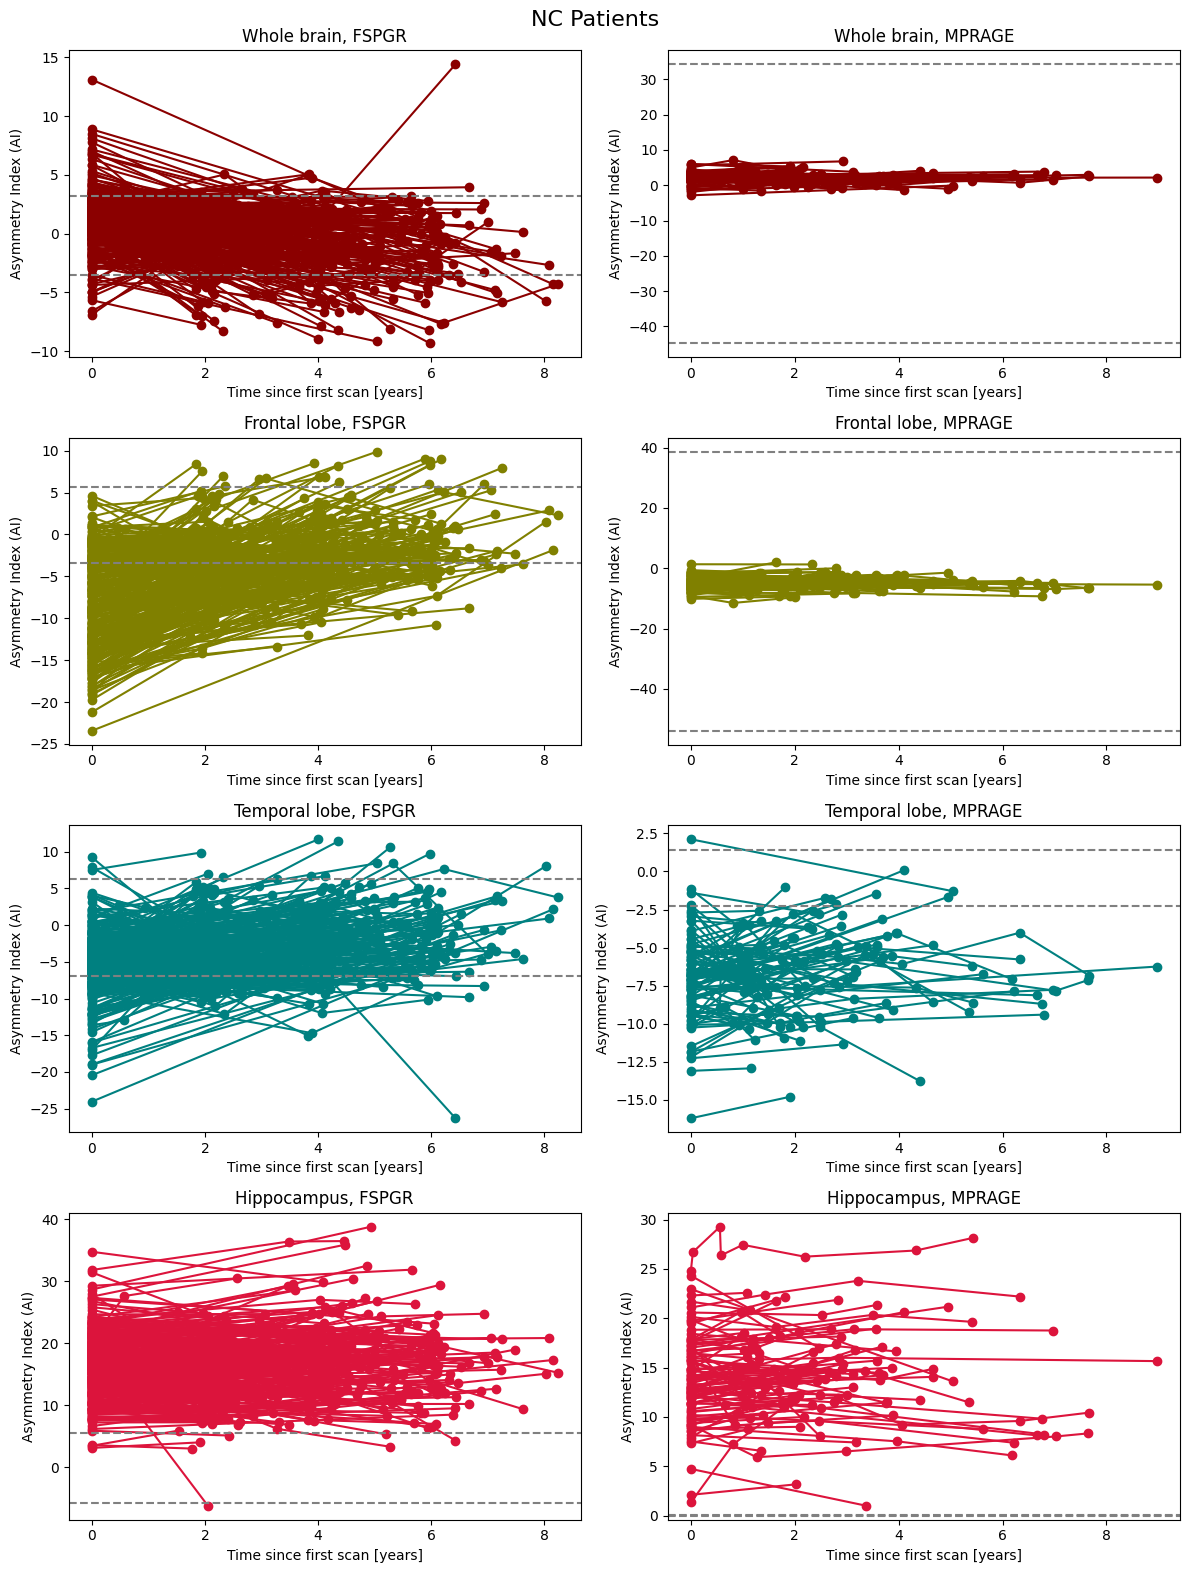

In [29]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
fig.suptitle('NC Patients', fontsize=16)

# Titles for the subplots
titles = [
    "Whole brain, FSPGR", "Whole brain, MPRAGE",
    "Frontal lobe, FSPGR", "Frontal lobe, MPRAGE",
    "Temporal lobe, FSPGR", "Temporal lobe, MPRAGE",
    "Hippocampus, FSPGR", "Hippocampus, MPRAGE"
]

# Iterate over the rows (regions) and plot for FSPGR (left) and MPRAGE (right)
for i in range(4):
    # FSPGR plot on the left column
    for naccid, ai_values in AI_nc_fspgr[i].items():
        if naccid in nc_scan_times:
            scan_times = nc_scan_times[naccid]
            axes[i, 0].plot(scan_times, ai_values, color=colors[i], marker='o')
    
    axes[i, 0].set_title(titles[2 * i])   # Title for the subplot
    axes[i, 0].set_xlabel('Time since first scan [years]')
    axes[i, 0].set_ylabel('Asymmetry Index (AI)')
    axes[i, 0].axhline(LOA_fspgr[i][0], color='gray', linestyle='--')
    axes[i, 0].axhline(LOA_fspgr[i][1], color='gray', linestyle='--')

    # MPRAGE plot on the right column
    for naccid, ai_values in AI_nc_mprage[i].items():
        if naccid in nc_scan_times:
            scan_times = nc_scan_times[naccid]
            axes[i, 1].plot(scan_times, ai_values, color=colors[i], marker='o')
    axes[i, 1].set_title(titles[2 * i + 1])   # Title for the subplot
    axes[i, 1].set_xlabel('Time since first scan [years]')
    axes[i, 1].set_ylabel('Asymmetry Index (AI)')
    axes[i, 1].axhline(LOA_mprage[i][0], color='gray', linestyle='--')
    axes[i, 1].axhline(LOA_mprage[i][1], color='gray', linestyle='--')

plt.tight_layout()  
#plt.savefig(savePath+'retry/AI_longitudinal_nc_LOA.png')
plt.show()

MCI

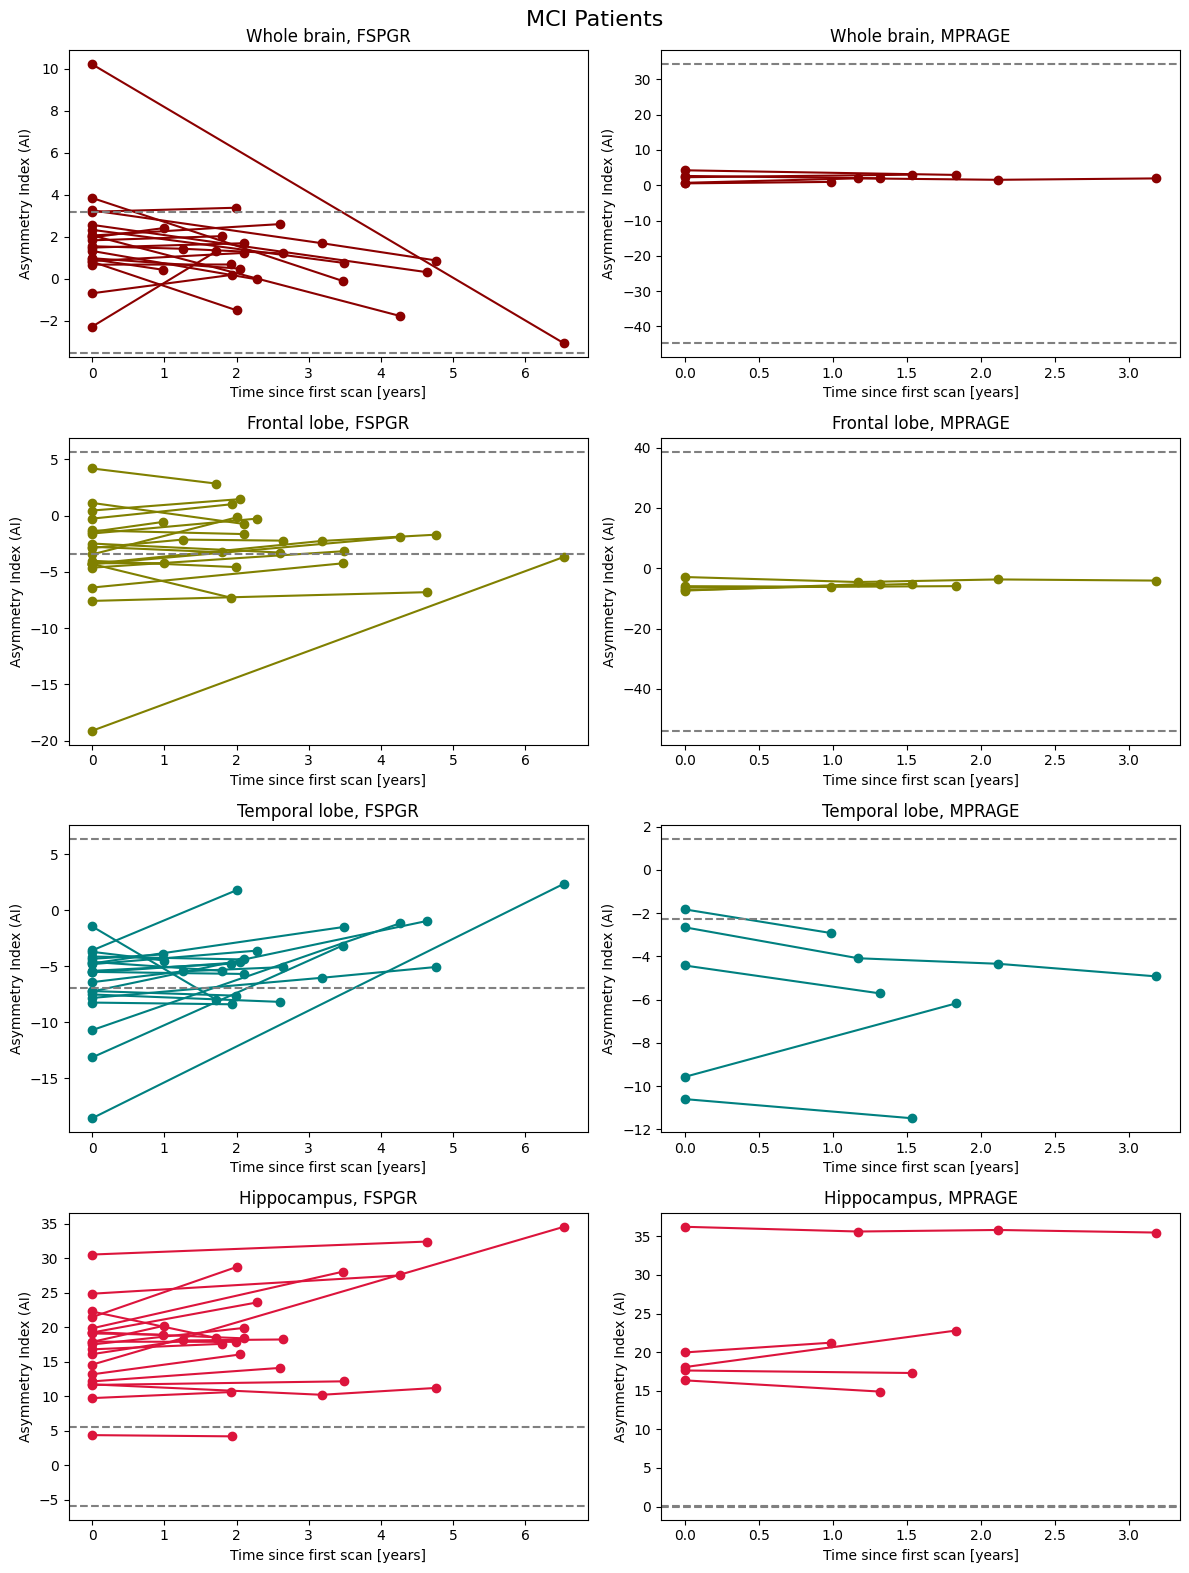

In [28]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
fig.suptitle('MCI Patients', fontsize=16)

# Titles for the subplots
titles = [
    "Whole brain, FSPGR", "Whole brain, MPRAGE",
    "Frontal lobe, FSPGR", "Frontal lobe, MPRAGE",
    "Temporal lobe, FSPGR", "Temporal lobe, MPRAGE",
    "Hippocampus, FSPGR", "Hippocampus, MPRAGE"
]

# Iterate over the rows (regions) and plot for FSPGR (left) and MPRAGE (right)
for i in range(4):
    # FSPGR plot on the left column
    for naccid, ai_values in AI_mci_fspgr[i].items():
        if naccid in mci_scan_times:
            scan_times = mci_scan_times[naccid]
            if len(scan_times) == len(ai_values):
                axes[i, 0].plot(scan_times, ai_values, color=colors[i], marker='o')
    axes[i, 0].set_title(titles[2 * i])   # Title for the subplot
    axes[i, 0].set_xlabel('Time since first scan [years]')
    axes[i, 0].set_ylabel('Asymmetry Index (AI)')
    axes[i, 0].axhline(LOA_fspgr[i][0], color='gray', linestyle='--')
    axes[i, 0].axhline(LOA_fspgr[i][1], color='gray', linestyle='--')

    # MPRAGE plot on the right column
    for naccid, ai_values in AI_mci_mprage[i].items():
        if naccid in mci_scan_times:
            scan_times = mci_scan_times[naccid]
            if len(scan_times) == len(ai_values):
                axes[i, 1].plot(scan_times, ai_values, color=colors[i], marker='o')
    axes[i, 1].set_title(titles[2 * i + 1])   # Title for the subplot
    axes[i, 1].set_xlabel('Time since first scan [years]')
    axes[i, 1].set_ylabel('Asymmetry Index (AI)')
    axes[i, 1].axhline(LOA_mprage[i][0], color='gray', linestyle='--')
    axes[i, 1].axhline(LOA_mprage[i][1], color='gray', linestyle='--')

plt.tight_layout()  
plt.savefig(savePath+'retry/AI_longitudinal_mci_LOA.png')
plt.show()

ALZD

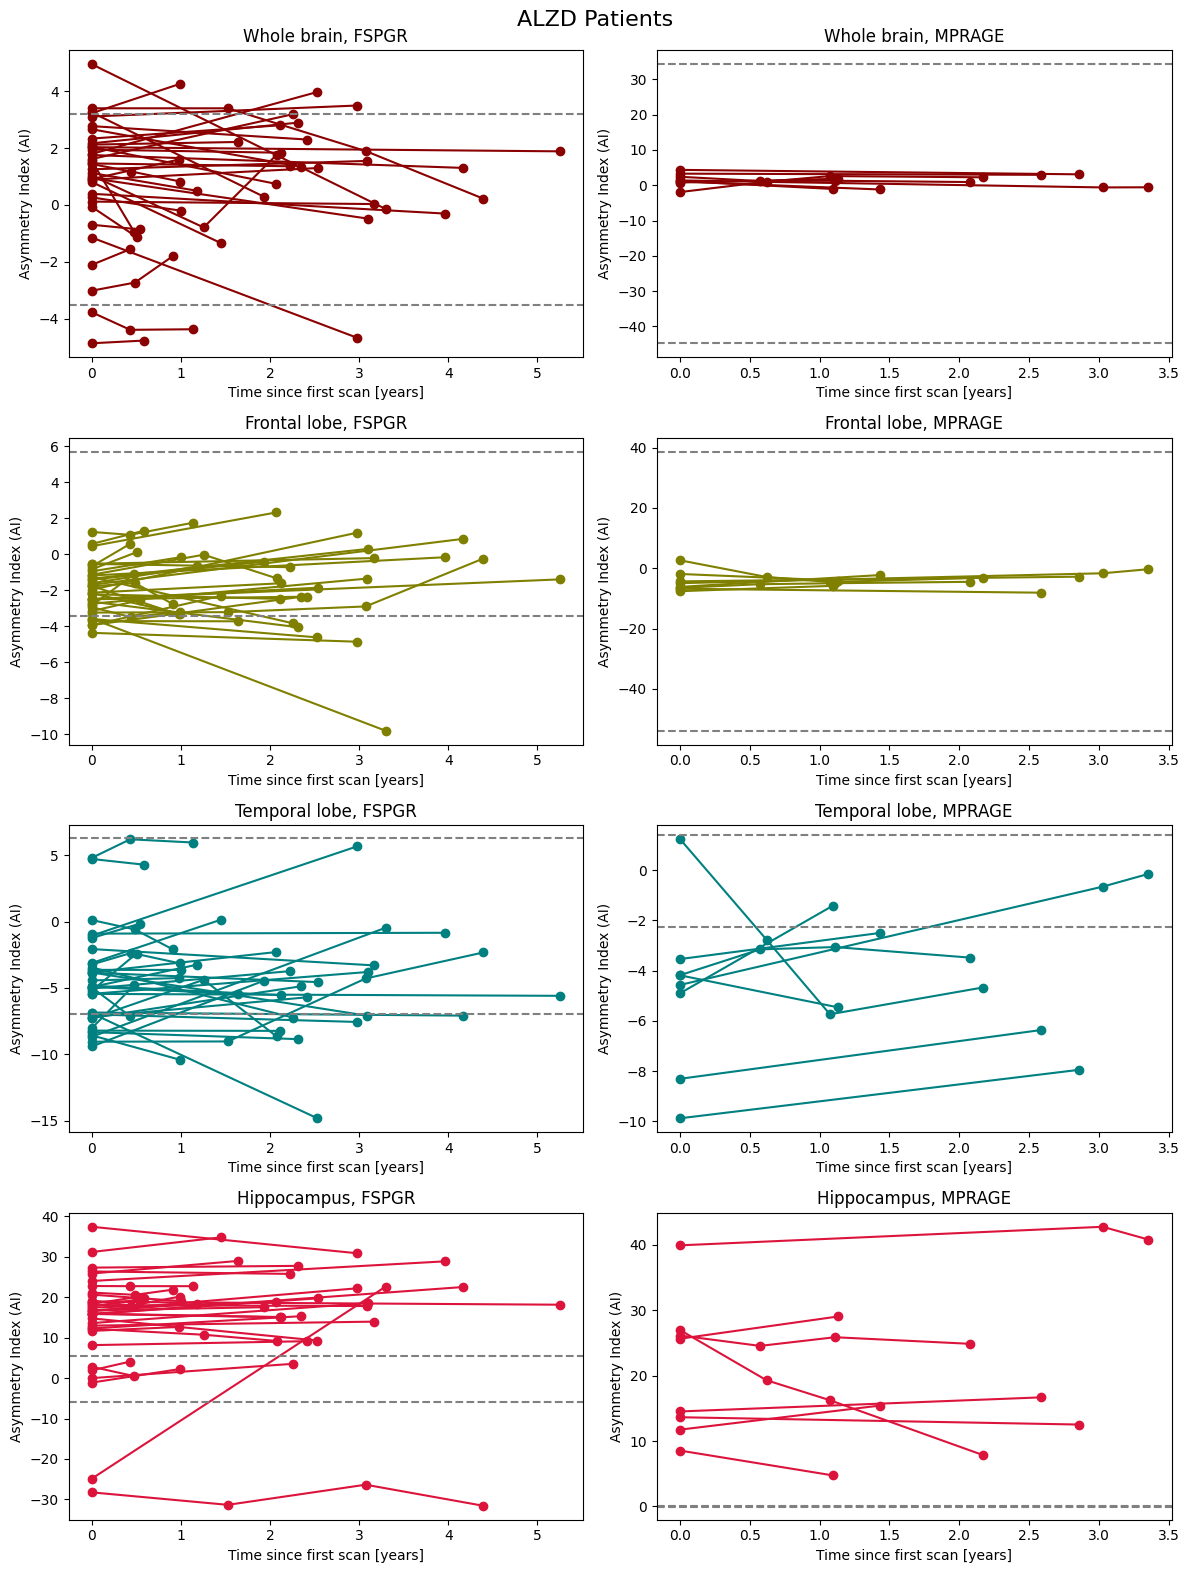

In [27]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
fig.suptitle('ALZD Patients', fontsize=16)

# Titles for the subplots
titles = [
    "Whole brain, FSPGR", "Whole brain, MPRAGE",
    "Frontal lobe, FSPGR", "Frontal lobe, MPRAGE",
    "Temporal lobe, FSPGR", "Temporal lobe, MPRAGE",
    "Hippocampus, FSPGR", "Hippocampus, MPRAGE"
]

# Iterate over the rows (regions) and plot for FSPGR (left) and MPRAGE (right)
for i in range(4):
    # FSPGR plot on the left column
    for naccid, ai_values in AI_alzd_fspgr[i].items():
        if naccid in alzd_scan_times:
            scan_times = alzd_scan_times[naccid]
            axes[i, 0].plot(scan_times, ai_values, color=colors[i], marker='o')
    axes[i, 0].set_title(titles[2 * i])   # Title for the subplot
    axes[i, 0].set_xlabel('Time since first scan [years]')
    axes[i, 0].set_ylabel('Asymmetry Index (AI)')
    axes[i, 0].axhline(LOA_fspgr[i][0], color='gray', linestyle='--')
    axes[i, 0].axhline(LOA_fspgr[i][1], color='gray', linestyle='--')

    # MPRAGE plot on the right column
    for naccid, ai_values in AI_alzd_mprage[i].items():
        if naccid in alzd_scan_times:
            scan_times = alzd_scan_times[naccid]
            axes[i, 1].plot(scan_times, ai_values, color=colors[i], marker='o')
    axes[i, 1].set_title(titles[2 * i + 1])   # Title for the subplot
    axes[i, 1].set_xlabel('Time since first scan [years]')
    axes[i, 1].set_ylabel('Asymmetry Index (AI)')
    axes[i, 1].axhline(LOA_mprage[i][0], color='gray', linestyle='--')
    axes[i, 1].axhline(LOA_mprage[i][1], color='gray', linestyle='--')

plt.tight_layout()  
#plt.savefig(savePath+'retry/AI_longitudinal_alzd_LOA.png')
plt.show()

TRANS

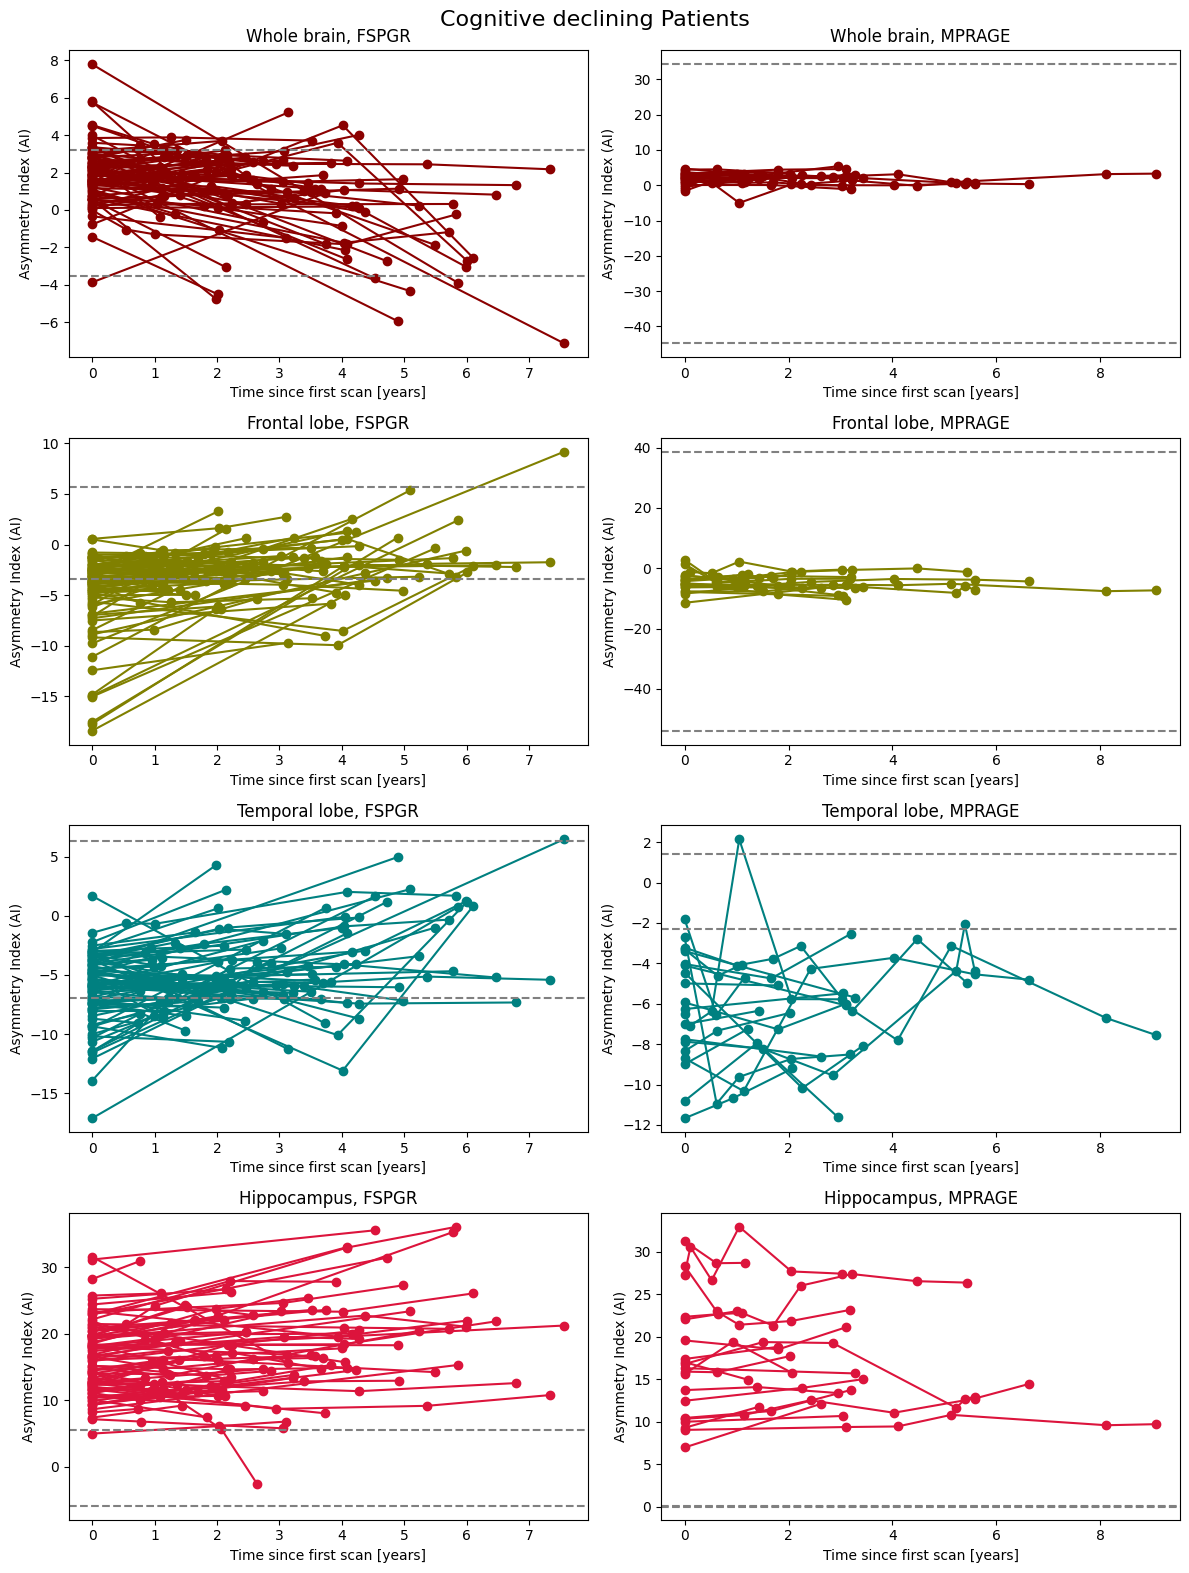

In [26]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
fig.suptitle('Cognitive declining Patients', fontsize=16)

# Titles for the subplots
titles = [
    "Whole brain, FSPGR", "Whole brain, MPRAGE",
    "Frontal lobe, FSPGR", "Frontal lobe, MPRAGE",
    "Temporal lobe, FSPGR", "Temporal lobe, MPRAGE",
    "Hippocampus, FSPGR", "Hippocampus, MPRAGE"
]

# Iterate over the rows (regions) and plot for FSPGR (left) and MPRAGE (right)
for i in range(4):
    # FSPGR plot on the left column
    for naccid, ai_values in AI_trans_fspgr[i].items():
        if naccid in trans_scan_times:
            scan_times = trans_scan_times[naccid]
            axes[i, 0].plot(scan_times, ai_values, color=colors[i], marker='o')
    axes[i, 0].set_title(titles[2 * i])   # Title for the subplot
    axes[i, 0].set_xlabel('Time since first scan [years]')
    axes[i, 0].set_ylabel('Asymmetry Index (AI)')
    # LOA
    axes[i, 0].axhline(LOA_fspgr[i][0], color='gray', linestyle='--')
    axes[i, 0].axhline(LOA_fspgr[i][1], color='gray', linestyle='--')

    # MPRAGE plot on the right column
    for naccid, ai_values in AI_trans_mprage[i].items():
        if naccid in trans_scan_times:
            scan_times = trans_scan_times[naccid]
            axes[i, 1].plot(scan_times, ai_values, color=colors[i], marker='o')
    axes[i, 1].set_title(titles[2 * i + 1])   # Title for the subplot
    axes[i, 1].set_xlabel('Time since first scan [years]')
    axes[i, 1].set_ylabel('Asymmetry Index (AI)')
    # LOA
    axes[i, 1].axhline(LOA_mprage[i][0], color='gray', linestyle='--')
    axes[i, 1].axhline(LOA_mprage[i][1], color='gray', linestyle='--')

plt.tight_layout()  
#plt.savefig(savePath+'retry/AI_longitudinal_trans_LOA.png')
plt.show()

## Normalizing AI by value at baseline
Now I want to normalize/divide all the AI value by its corresponding value at basline. That way we get a better look at how the AI changes in time. 

In [34]:
# Normalizes AI data by dividing each array in each dictionary by its first element.
def normalize_ai_data(ai_data):
    for ai_dict in ai_data:
        for naccid, ai_values in ai_dict.items():
            if len(ai_values) > 0:
                ai_dict[naccid] = ai_values / ai_values[0]  # Normalize so first value is 1
    return ai_data

In [35]:
# Normalize each group of AI data
AI_nc_fspgr = normalize_ai_data(AI_nc_fspgr)
AI_nc_mprage = normalize_ai_data(AI_nc_mprage)
AI_mci_fspgr = normalize_ai_data(AI_mci_fspgr)
AI_mci_mprage = normalize_ai_data(AI_mci_mprage)
AI_alzd_fspgr = normalize_ai_data(AI_alzd_fspgr)
AI_alzd_mprage = normalize_ai_data(AI_alzd_mprage)
AI_trans_fspgr = normalize_ai_data(AI_trans_fspgr)
AI_trans_mprage = normalize_ai_data(AI_trans_mprage)

In [36]:
print(AI_nc_fspgr)

[{'NACC191719': array([1.        , 0.91622148, 0.54303884]), 'NACC037828': array([1.        , 0.16966803, 1.65063492]), 'NACC842682': array([1.        , 0.69872375]), 'NACC850288': array([1.        , 0.50932301]), 'NACC497363': array([1.        , 1.11787584]), 'NACC371779': array([1.        , 1.32627046]), 'NACC436835': array([1.        , 0.89426981]), 'NACC894239': array([1.        , 0.55828663]), 'NACC506625': array([1.        , 2.34826194]), 'NACC604763': array([1.        , 1.79432097]), 'NACC281764': array([1.        , 0.92334138]), 'NACC879596': array([1.        , 0.67231636]), 'NACC016412': array([1.        , 1.35374   , 2.01643387, 1.98826222]), 'NACC564360': array([1.        , 1.87400767]), 'NACC915172': array([1.        , 0.86280646]), 'NACC138144': array([1.        , 0.92038503]), 'NACC481835': array([1.        , 1.03795845]), 'NACC555055': array([1.        , 1.41858936]), 'NACC601799': array([1.        , 0.96197207, 0.62096483]), 'NACC340259': array([1.      , 0.519102]), 'N

### Average AI and std

In [37]:
def calculate_ai_stats(ai_dict):
    all_ai_values = []
    for ai_values in ai_dict.values():
        all_ai_values.extend(ai_values)  
    all_ai_values = np.array(all_ai_values)
    avg = np.mean(all_ai_values)
    std = np.std(all_ai_values)
    return avg, std

In [38]:
# Calculate stats for each group and region-sequence combination
# NC group
avg_AI_nc_fspgr_whole, std_AI_nc_fspgr_whole = calculate_ai_stats(AI_nc_fspgr_whole)
avg_AI_nc_fspgr_frontal, std_AI_nc_fspgr_frontal = calculate_ai_stats(AI_nc_fspgr_frontal_lobe)
avg_AI_nc_fspgr_temporal, std_AI_nc_fspgr_temporal = calculate_ai_stats(AI_nc_fspgr_temporal_lobe)
avg_AI_nc_fspgr_hippocampus, std_AI_nc_fspgr_hippocampus = calculate_ai_stats(AI_nc_fspgr_hippocampus)

avg_AI_nc_mprage_whole, std_AI_nc_mprage_whole = calculate_ai_stats(AI_nc_mprage_whole)
avg_AI_nc_mprage_frontal, std_AI_nc_mprage_frontal = calculate_ai_stats(AI_nc_mprage_frontal_lobe)
avg_AI_nc_mprage_temporal, std_AI_nc_mprage_temporal = calculate_ai_stats(AI_nc_mprage_temporal_lobe)
avg_AI_nc_mprage_hippocampus, std_AI_nc_mprage_hippocampus = calculate_ai_stats(AI_nc_mprage_hippocampus)

# MCI group
avg_AI_mci_fspgr_whole, std_AI_mci_fspgr_whole = calculate_ai_stats(AI_mci_fspgr_whole)
avg_AI_mci_fspgr_frontal, std_AI_mci_fspgr_frontal = calculate_ai_stats(AI_mci_fspgr_frontal_lobe)
avg_AI_mci_fspgr_temporal, std_AI_mci_fspgr_temporal = calculate_ai_stats(AI_mci_fspgr_temporal_lobe)
avg_AI_mci_fspgr_hippocampus, std_AI_mci_fspgr_hippocampus = calculate_ai_stats(AI_mci_fspgr_hippocampus)

avg_AI_mci_mprage_whole, std_AI_mci_mprage_whole = calculate_ai_stats(AI_mci_mprage_whole)
avg_AI_mci_mprage_frontal, std_AI_mci_mprage_frontal = calculate_ai_stats(AI_mci_mprage_frontal_lobe)
avg_AI_mci_mprage_temporal, std_AI_mci_mprage_temporal = calculate_ai_stats(AI_mci_mprage_temporal_lobe)
avg_AI_mci_mprage_hippocampus, std_AI_mci_mprage_hippocampus = calculate_ai_stats(AI_mci_mprage_hippocampus)

# ALZD group
avg_AI_alzd_fspgr_whole, std_AI_alzd_fspgr_whole = calculate_ai_stats(AI_alzd_fspgr_whole)
avg_AI_alzd_fspgr_frontal, std_AI_alzd_fspgr_frontal = calculate_ai_stats(AI_alzd_fspgr_frontal_lobe)
avg_AI_alzd_fspgr_temporal, std_AI_alzd_fspgr_temporal = calculate_ai_stats(AI_alzd_fspgr_temporal_lobe)
avg_AI_alzd_fspgr_hippocampus, std_AI_alzd_fspgr_hippocampus = calculate_ai_stats(AI_alzd_fspgr_hippocampus)

avg_AI_alzd_mprage_whole, std_AI_alzd_mprage_whole = calculate_ai_stats(AI_alzd_mprage_whole)
avg_AI_alzd_mprage_frontal, std_AI_alzd_mprage_frontal = calculate_ai_stats(AI_alzd_mprage_frontal_lobe)
avg_AI_alzd_mprage_temporal, std_AI_alzd_mprage_temporal = calculate_ai_stats(AI_alzd_mprage_temporal_lobe)
avg_AI_alzd_mprage_hippocampus, std_AI_alzd_mprage_hippocampus = calculate_ai_stats(AI_alzd_mprage_hippocampus)

# TRANS group
avg_AI_trans_fspgr_whole, std_AI_trans_fspgr_whole = calculate_ai_stats(AI_trans_fspgr_whole)
avg_AI_trans_fspgr_frontal, std_AI_trans_fspgr_frontal = calculate_ai_stats(AI_trans_fspgr_frontal_lobe)
avg_AI_trans_fspgr_temporal, std_AI_trans_fspgr_temporal = calculate_ai_stats(AI_trans_fspgr_temporal_lobe)
avg_AI_trans_fspgr_hippocampus, std_AI_trans_fspgr_hippocampus = calculate_ai_stats(AI_trans_fspgr_hippocampus)

avg_AI_trans_mprage_whole, std_AI_trans_mprage_whole = calculate_ai_stats(AI_trans_mprage_whole)
avg_AI_trans_mprage_frontal, std_AI_trans_mprage_frontal = calculate_ai_stats(AI_trans_mprage_frontal_lobe)
avg_AI_trans_mprage_temporal, std_AI_trans_mprage_temporal = calculate_ai_stats(AI_trans_mprage_temporal_lobe)
avg_AI_trans_mprage_hippocampus, std_AI_trans_mprage_hippocampus = calculate_ai_stats(AI_trans_mprage_hippocampus)

Sorting the results in plottable format. 

In [39]:
avg_AI_nc_fspgr = [avg_AI_nc_fspgr_whole, avg_AI_nc_fspgr_frontal, avg_AI_nc_fspgr_temporal, avg_AI_nc_fspgr_hippocampus]
std_AI_nc_fspgr = [std_AI_nc_fspgr_whole, std_AI_nc_fspgr_frontal, std_AI_nc_fspgr_temporal, std_AI_nc_fspgr_hippocampus]
avg_AI_nc_mprage = [avg_AI_nc_mprage_whole, avg_AI_nc_mprage_frontal, avg_AI_nc_mprage_temporal, avg_AI_nc_mprage_hippocampus]
std_AI_nc_mprage = [std_AI_nc_mprage_whole, std_AI_nc_mprage_frontal, std_AI_nc_mprage_temporal, std_AI_nc_mprage_hippocampus]

avg_AI_mci_fspgr = [avg_AI_mci_fspgr_whole, avg_AI_mci_fspgr_frontal, avg_AI_mci_fspgr_temporal, avg_AI_mci_fspgr_hippocampus]
std_AI_mci_fspgr = [std_AI_mci_fspgr_whole, std_AI_mci_fspgr_frontal, std_AI_mci_fspgr_temporal, std_AI_mci_fspgr_hippocampus]
avg_AI_mci_mprage = [avg_AI_mci_mprage_whole, avg_AI_mci_mprage_frontal, avg_AI_mci_mprage_temporal, avg_AI_mci_mprage_hippocampus]
std_AI_mci_mprage = [std_AI_mci_mprage_whole, std_AI_mci_mprage_frontal, std_AI_mci_mprage_temporal, std_AI_mci_mprage_hippocampus]

avg_AI_alzd_fspgr = [avg_AI_alzd_fspgr_whole, avg_AI_alzd_fspgr_frontal, avg_AI_alzd_fspgr_temporal, avg_AI_alzd_fspgr_hippocampus]
std_AI_alzd_fspgr = [std_AI_alzd_fspgr_whole, std_AI_alzd_fspgr_frontal, std_AI_alzd_fspgr_temporal, std_AI_alzd_fspgr_hippocampus]
avg_AI_alzd_mprage = [avg_AI_alzd_mprage_whole, avg_AI_alzd_mprage_frontal, avg_AI_alzd_mprage_temporal, avg_AI_alzd_mprage_hippocampus]
std_AI_alzd_mprage = [std_AI_alzd_mprage_whole, std_AI_alzd_mprage_frontal, std_AI_alzd_mprage_temporal, std_AI_alzd_mprage_hippocampus]

avg_AI_trans_fspgr = [avg_AI_trans_fspgr_whole, avg_AI_trans_fspgr_frontal, avg_AI_trans_fspgr_temporal, avg_AI_trans_fspgr_hippocampus]
std_AI_trans_fspgr = [std_AI_trans_fspgr_whole, std_AI_trans_fspgr_frontal, std_AI_trans_fspgr_temporal, std_AI_trans_fspgr_hippocampus]
avg_AI_trans_mprage = [avg_AI_trans_mprage_whole, avg_AI_trans_mprage_frontal, avg_AI_trans_mprage_temporal, avg_AI_trans_mprage_hippocampus]
std_AI_trans_mprage = [std_AI_trans_mprage_whole, std_AI_trans_mprage_frontal, std_AI_trans_mprage_temporal, std_AI_trans_mprage_hippocampus]

### Plotting

NC

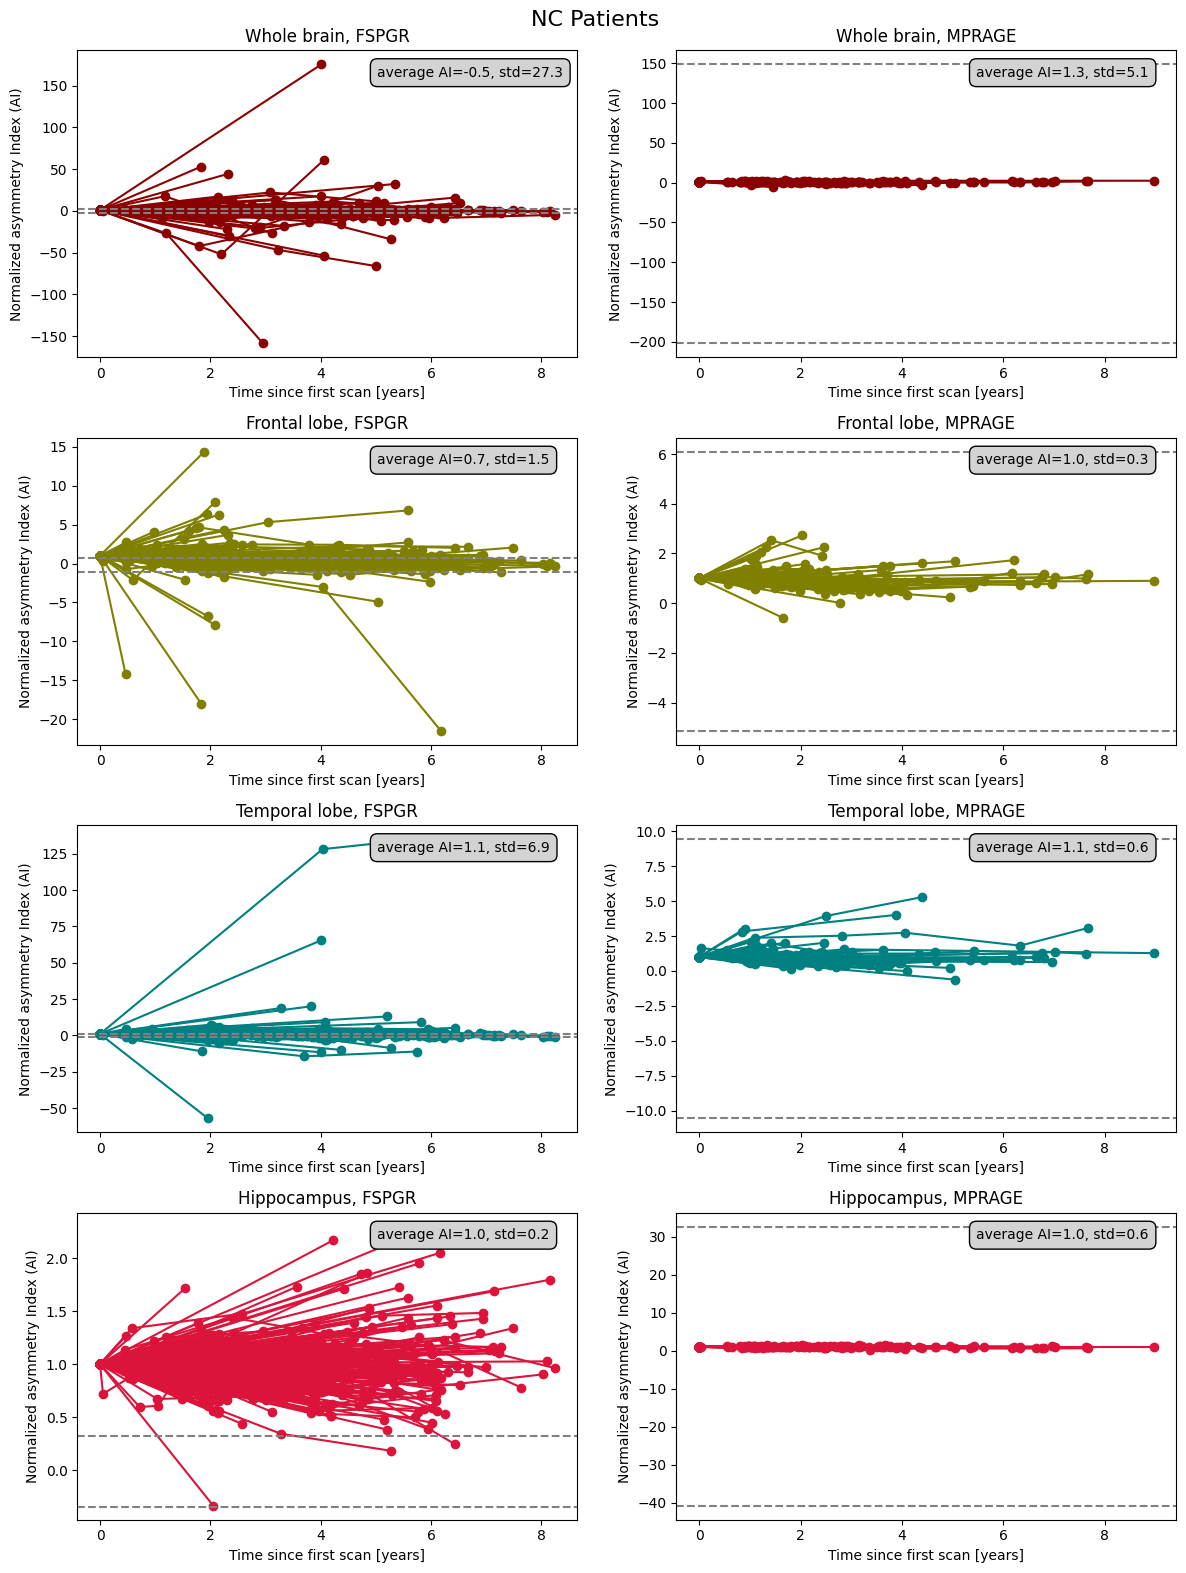

In [41]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
fig.suptitle('NC Patients', fontsize=16)

# Titles for the subplots
titles = [
    "Whole brain, FSPGR", "Whole brain, MPRAGE",
    "Frontal lobe, FSPGR", "Frontal lobe, MPRAGE",
    "Temporal lobe, FSPGR", "Temporal lobe, MPRAGE",
    "Hippocampus, FSPGR", "Hippocampus, MPRAGE"
]

# Iterate over the rows (regions) and plot for FSPGR (left) and MPRAGE (right)
for i in range(4):
    # FSPGR plot on the left column
    for naccid, ai_values in AI_nc_fspgr[i].items():
        if naccid in nc_scan_times:
            scan_times = nc_scan_times[naccid]
            # outliers
            if ai_values[1] > -200:
                axes[i, 0].plot(scan_times, ai_values, color=colors[i], marker='o')
    # LOA for NC
    axes[i, 0].axhline(LOA_fspgr_normalized[i][0], color='gray', linestyle='--')
    axes[i, 0].axhline(LOA_fspgr_normalized[i][1], color='gray', linestyle='--')
    axes[i, 0].set_title(titles[2 * i])   # Title for the subplot
    axes[i, 0].set_xlabel('Time since first scan [years]')
    axes[i, 0].set_ylabel('Normalized asymmetry Index (AI)')
    axes[i, 0].text(
    0.6,  # x-coordinate in axes fraction (0 is left, 1 is right)
    0.95,  # y-coordinate in axes fraction (0 is bottom, 1 is top)
    s=f'average AI={avg_AI_nc_fspgr[i]:.1f}, std={std_AI_nc_fspgr[i]:.1f}', 
    fontsize=10, 
    color='black', 
    bbox=dict(facecolor='lightgrey', edgecolor='black', boxstyle='round,pad=0.5'),
    transform=axes[i, 0].transAxes,  
    verticalalignment='top'  
)

    # MPRAGE plot on the right column
    for naccid, ai_values in AI_nc_mprage[i].items():
        if naccid in nc_scan_times:
            scan_times = nc_scan_times[naccid]
            # outliers
            if len(ai_values) > 2:
                if ai_values[1] < 15 and ai_values[2] < 8:
                    axes[i, 1].plot(scan_times, ai_values, color=colors[i], marker='o')
            elif len(ai_values) == 2:
                if ai_values[1] < 15:
                    axes[i, 1].plot(scan_times, ai_values, color=colors[i], marker='o')
    # LOA for NC
    axes[i, 1].axhline(LOA_mprage_normalized[i][0], color='gray', linestyle='--')
    axes[i, 1].axhline(LOA_mprage_normalized[i][1], color='gray', linestyle='--')
    axes[i, 1].set_title(titles[2 * i + 1])   # Title for the subplot
    axes[i, 1].set_xlabel('Time since first scan [years]')
    axes[i, 1].set_ylabel('Normalized asymmetry Index (AI)')
    axes[i, 1].text(
    0.6,  # x-coordinate in axes fraction (0 is left, 1 is right)
    0.95,  # y-coordinate in axes fraction (0 is bottom, 1 is top)
    s=f'average AI={avg_AI_nc_mprage[i]:.1f}, std={std_AI_nc_mprage[i]:.1f}', 
    fontsize=10, 
    color='black', 
    bbox=dict(facecolor='lightgrey', edgecolor='black', boxstyle='round,pad=0.5'),
    transform=axes[i, 1].transAxes,  
    verticalalignment='top'  
)

plt.tight_layout()  
#plt.savefig(savePath+'retry/AI_longitudinal_nc_normalized_LOA.png')
plt.show()

MCI

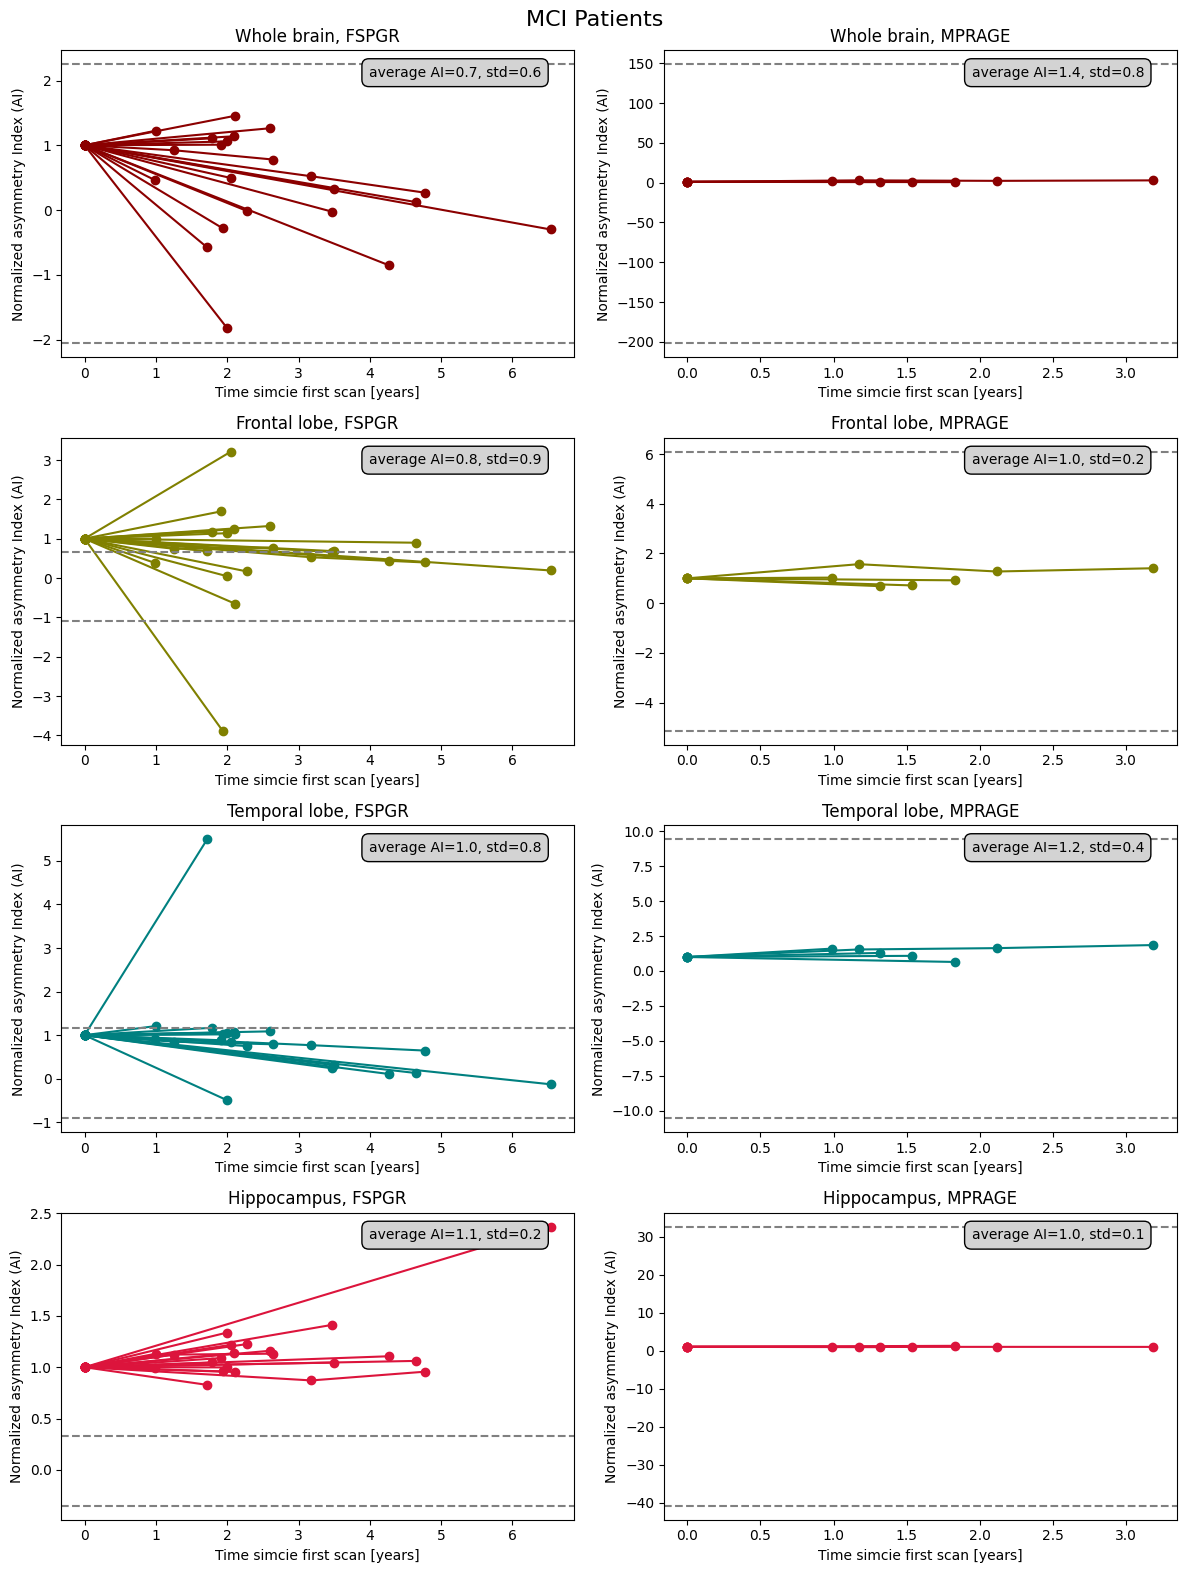

In [43]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
fig.suptitle('MCI Patients', fontsize=16)

# Titles for the subplots
titles = [
    "Whole brain, FSPGR", "Whole brain, MPRAGE",
    "Frontal lobe, FSPGR", "Frontal lobe, MPRAGE",
    "Temporal lobe, FSPGR", "Temporal lobe, MPRAGE",
    "Hippocampus, FSPGR", "Hippocampus, MPRAGE"
]

# Iterate over the rows (regions) and plot for FSPGR (left) and MPRAGE (right)
for i in range(4):
    # FSPGR plot on the left column
    for naccid, ai_values in AI_mci_fspgr[i].items():
        if naccid in mci_scan_times:
            scan_times = mci_scan_times[naccid]
            if len(scan_times) == len(ai_values):
                axes[i, 0].plot(scan_times, ai_values, color=colors[i], marker='o')
    
    axes[i, 0].axhline(LOA_fspgr_normalized[i][0], color='gray', linestyle='--')
    axes[i, 0].axhline(LOA_fspgr_normalized[i][1], color='gray', linestyle='--')
    axes[i, 0].set_title(titles[2 * i])   # Title for the subplot
    axes[i, 0].set_xlabel('Time simcie first scan [years]')
    axes[i, 0].set_ylabel('Normalized asymmetry Index (AI)')
    axes[i, 0].text(
    0.6,  # x-coordinate in axes fraction (0 is left, 1 is right)
    0.95,  # y-coordinate in axes fraction (0 is bottom, 1 is top)
    s=f'average AI={avg_AI_mci_fspgr[i]:.1f}, std={std_AI_mci_fspgr[i]:.1f}', 
    fontsize=10, 
    color='black', 
    bbox=dict(facecolor='lightgrey', edgecolor='black', boxstyle='round,pad=0.5'),
    transform=axes[i, 0].transAxes,  
    verticalalignment='top'  
)

    # MPRAGE plot on the right column
    for naccid, ai_values in AI_mci_mprage[i].items():
        if naccid in mci_scan_times:
            scan_times = mci_scan_times[naccid]
            if len(scan_times) == len(ai_values):
                axes[i, 1].plot(scan_times, ai_values, color=colors[i], marker='o')
    
    axes[i, 1].axhline(LOA_mprage_normalized[i][0], color='gray', linestyle='--')
    axes[i, 1].axhline(LOA_mprage_normalized[i][1], color='gray', linestyle='--')
    axes[i, 1].set_title(titles[2 * i + 1])   # Title for the subplot
    axes[i, 1].set_xlabel('Time simcie first scan [years]')
    axes[i, 1].set_ylabel('Normalized asymmetry Index (AI)')
    axes[i, 1].text(
    0.6,  # x-coordinate in axes fraction (0 is left, 1 is right)
    0.95,  # y-coordinate in axes fraction (0 is bottom, 1 is top)
    s=f'average AI={avg_AI_mci_mprage[i]:.1f}, std={std_AI_mci_mprage[i]:.1f}', 
    fontsize=10, 
    color='black', 
    bbox=dict(facecolor='lightgrey', edgecolor='black', boxstyle='round,pad=0.5'),
    transform=axes[i, 1].transAxes,  
    verticalalignment='top'  
)

plt.tight_layout()  
#plt.savefig(savePath+'retry/AI_longitudinal_mci_normalized_LOA.png')
plt.show()

ALZD

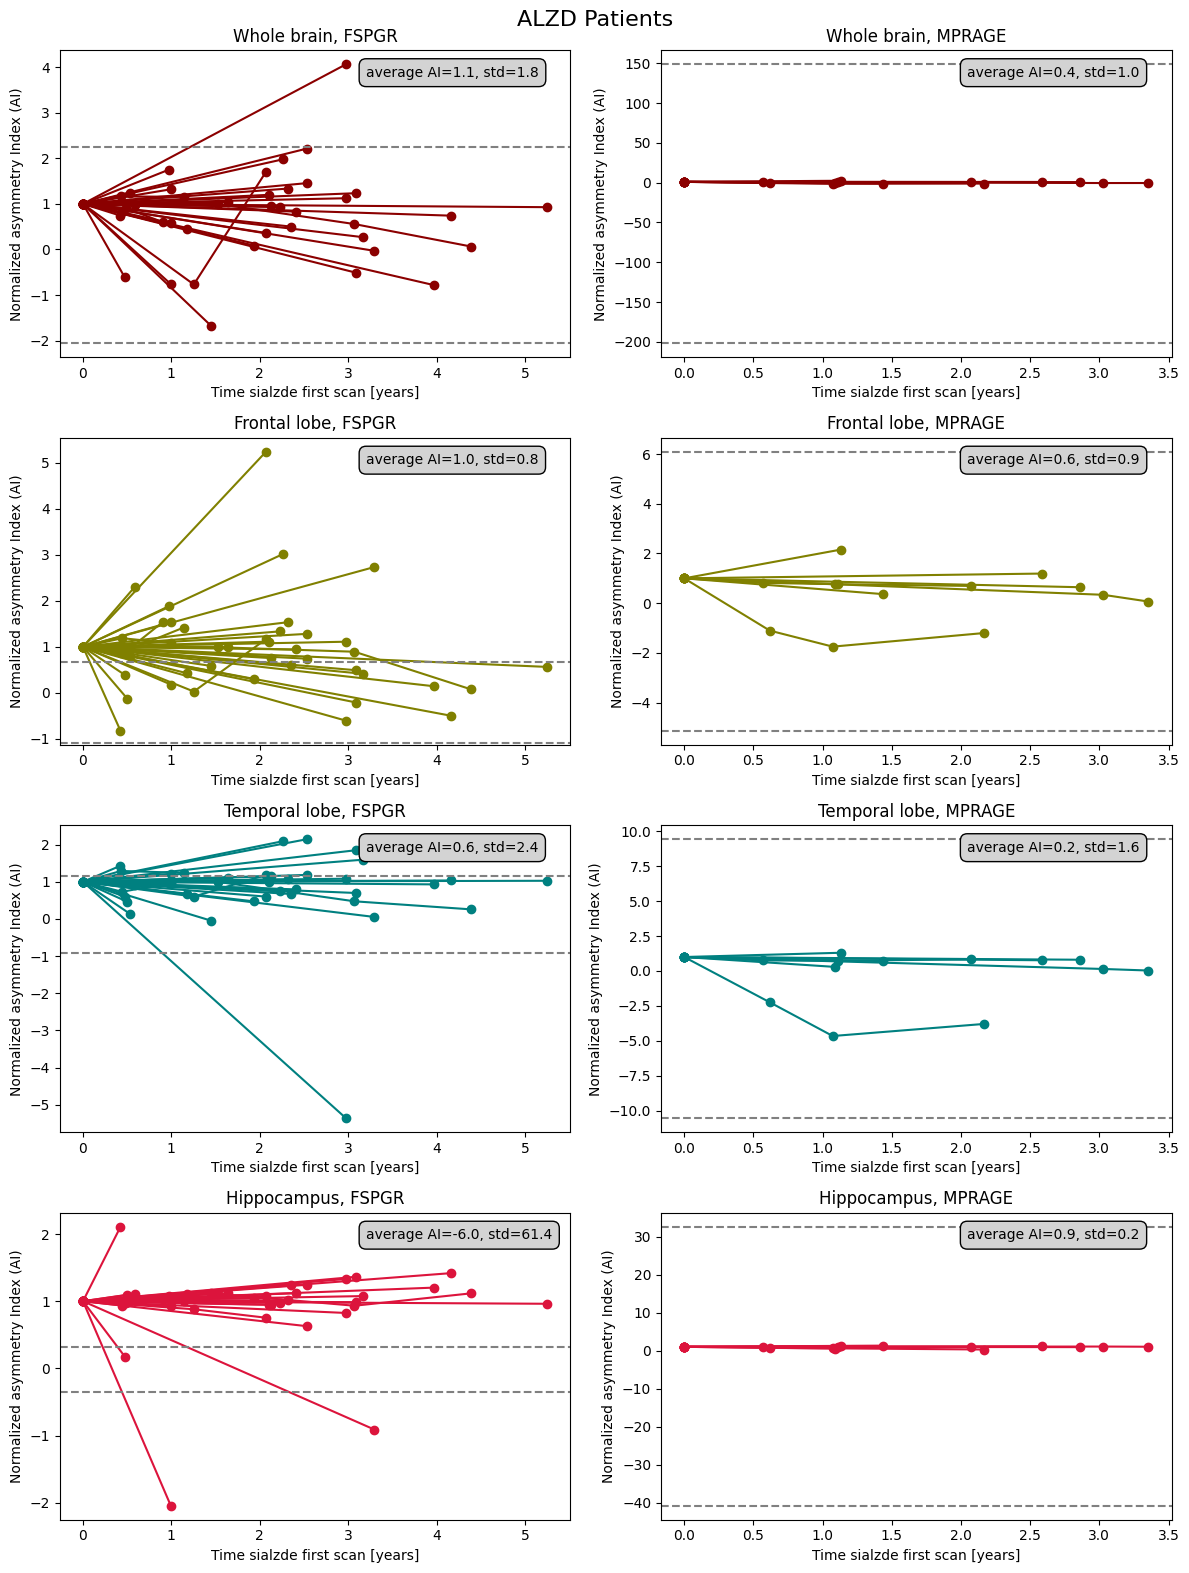

In [45]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
fig.suptitle('ALZD Patients', fontsize=16)

# Titles for the subplots
titles = [
    "Whole brain, FSPGR", "Whole brain, MPRAGE",
    "Frontal lobe, FSPGR", "Frontal lobe, MPRAGE",
    "Temporal lobe, FSPGR", "Temporal lobe, MPRAGE",
    "Hippocampus, FSPGR", "Hippocampus, MPRAGE"
]

# Iterate over the rows (regions) and plot for FSPGR (left) and MPRAGE (right)
for i in range(4):
    # FSPGR plot on the left column
    for naccid, ai_values in AI_alzd_fspgr[i].items():
        if naccid in alzd_scan_times:
            scan_times = alzd_scan_times[naccid]
            if len(scan_times) == len(ai_values):
                # just getting rid of one weird outlier
                if len(ai_values) == 3:
                    if ai_values[2] > -15:
                        axes[i, 0].plot(scan_times, ai_values, color=colors[i], marker='o')
                else: 
                    if ai_values[1] > -100 and ai_values[1] < 15:
                        axes[i, 0].plot(scan_times, ai_values, color=colors[i], marker='o')
    axes[i, 0].axhline(LOA_fspgr_normalized[i][0], color='gray', linestyle='--')
    axes[i, 0].axhline(LOA_fspgr_normalized[i][1], color='gray', linestyle='--')
    axes[i, 0].set_title(titles[2 * i])   # Title for the subplot
    axes[i, 0].set_xlabel('Time sialzde first scan [years]')
    axes[i, 0].set_ylabel('Normalized asymmetry Index (AI)')
    axes[i, 0].text(
    0.6,  # x-coordinate in axes fraction (0 is left, 1 is right)
    0.95,  # y-coordinate in axes fraction (0 is bottom, 1 is top)
    s=f'average AI={avg_AI_alzd_fspgr[i]:.1f}, std={std_AI_alzd_fspgr[i]:.1f}', 
    fontsize=10, 
    color='black', 
    bbox=dict(facecolor='lightgrey', edgecolor='black', boxstyle='round,pad=0.5'),
    transform=axes[i, 0].transAxes,  
    verticalalignment='top'  
)

    # MPRAGE plot on the right column
    for naccid, ai_values in AI_alzd_mprage[i].items():
        if naccid in alzd_scan_times:
            scan_times = alzd_scan_times[naccid]
            if len(scan_times) == len(ai_values):
                axes[i, 1].plot(scan_times, ai_values, color=colors[i], marker='o')
    axes[i, 1].axhline(LOA_mprage_normalized[i][0], color='gray', linestyle='--')
    axes[i, 1].axhline(LOA_mprage_normalized[i][1], color='gray', linestyle='--')
    axes[i, 1].set_title(titles[2 * i + 1])   # Title for the subplot
    axes[i, 1].set_xlabel('Time sialzde first scan [years]')
    axes[i, 1].set_ylabel('Normalized asymmetry Index (AI)')
    axes[i, 1].text(
    0.6,  # x-coordinate in axes fraction (0 is left, 1 is right)
    0.95,  # y-coordinate in axes fraction (0 is bottom, 1 is top)
    s=f'average AI={avg_AI_alzd_mprage[i]:.1f}, std={std_AI_alzd_mprage[i]:.1f}', 
    fontsize=10, 
    color='black', 
    bbox=dict(facecolor='lightgrey', edgecolor='black', boxstyle='round,pad=0.5'),
    transform=axes[i, 1].transAxes,  
    verticalalignment='top'  
)

plt.tight_layout()  
#plt.savefig(savePath+'retry/AI_longitudinal_alzd_normalized_LOA.png')
plt.show()

TRANS

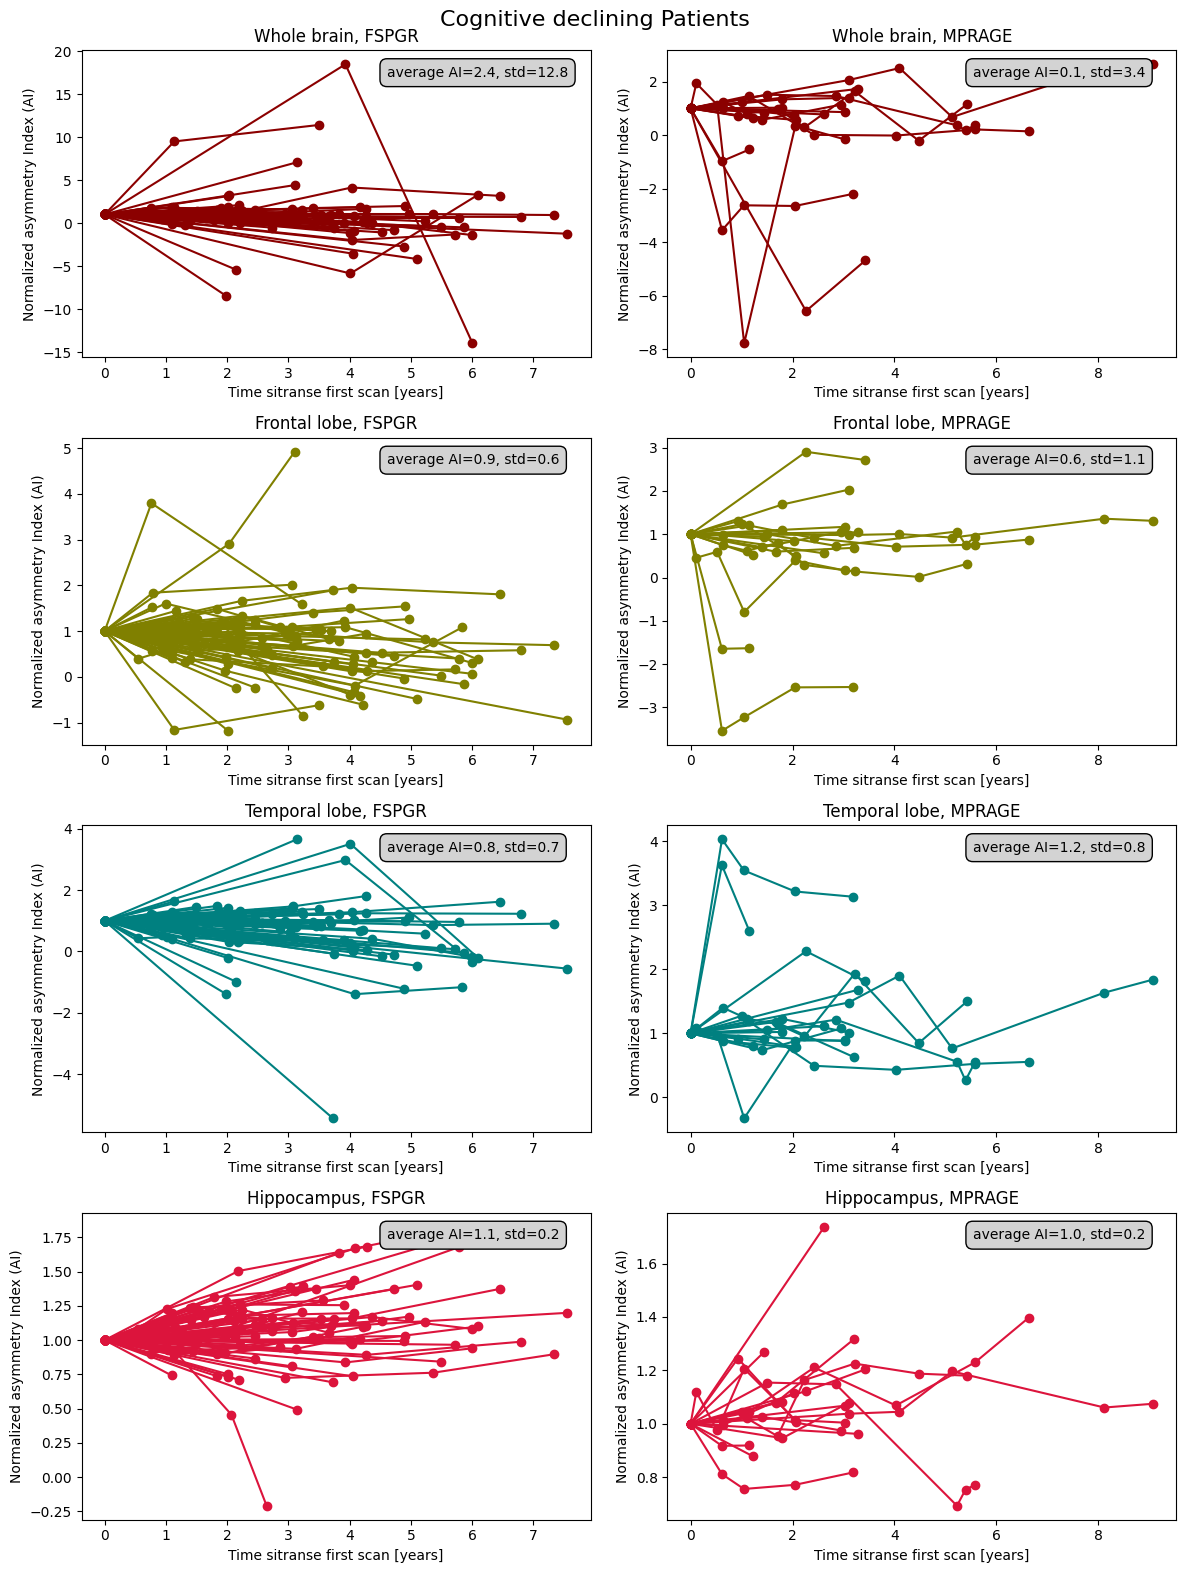

In [48]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
fig.suptitle('Cognitive declining Patients', fontsize=16)

# Titles for the subplots
titles = [
    "Whole brain, FSPGR", "Whole brain, MPRAGE",
    "Frontal lobe, FSPGR", "Frontal lobe, MPRAGE",
    "Temporal lobe, FSPGR", "Temporal lobe, MPRAGE",
    "Hippocampus, FSPGR", "Hippocampus, MPRAGE"
]

# Iterate over the rows (regions) and plot for FSPGR (left) and MPRAGE (right)
for i in range(4):
    # FSPGR plot on the left column
    for naccid, ai_values in AI_trans_fspgr[i].items():
        if naccid in trans_scan_times:
            scan_times = trans_scan_times[naccid]
            if len(scan_times) == len(ai_values):
                # one outlier again
                if ai_values[1] < 50:
                    axes[i, 0].plot(scan_times, ai_values, color=colors[i], marker='o')
    #axes[i, 0].axhline(LOA_fspgr_normalized[i][0], color='gray', linestyle='--')
    #axes[i, 0].axhline(LOA_fspgr_normalized[i][1], color='gray', linestyle='--')
    axes[i, 0].set_title(titles[2 * i])   # Title for the subplot
    axes[i, 0].set_xlabel('Time sitranse first scan [years]')
    axes[i, 0].set_ylabel('Normalized asymmetry Index (AI)')
    axes[i, 0].text(
    0.6,  # x-coordinate in axes fraction (0 is left, 1 is right)
    0.95,  # y-coordinate in axes fraction (0 is bottom, 1 is top)
    s=f'average AI={avg_AI_trans_fspgr[i]:.1f}, std={std_AI_trans_fspgr[i]:.1f}', 
    fontsize=10, 
    color='black', 
    bbox=dict(facecolor='lightgrey', edgecolor='black', boxstyle='round,pad=0.5'),
    transform=axes[i, 0].transAxes,  
    verticalalignment='top'  
)

    # MPRAGE plot on the right column
    for naccid, ai_values in AI_trans_mprage[i].items():
        if naccid in trans_scan_times:
            scan_times = trans_scan_times[naccid]
            if len(scan_times) == len(ai_values):
                if len(ai_values) == 3:
                    if ai_values[2] > -20:
                        axes[i, 1].plot(scan_times, ai_values, color=colors[i], marker='o')
                else:
                    axes[i, 1].plot(scan_times, ai_values, color=colors[i], marker='o')
    #axes[i, 1].axhline(LOA_mprage_normalized[i][0], color='gray', linestyle='--')
    #axes[i, 1].axhline(LOA_mprage_normalized[i][1], color='gray', linestyle='--')
    axes[i, 1].set_title(titles[2 * i + 1])   # Title for the subplot
    axes[i, 1].set_xlabel('Time sitranse first scan [years]')
    axes[i, 1].set_ylabel('Normalized asymmetry Index (AI)')
    axes[i, 1].text(
    0.6,  # x-coordinate in axes fraction (0 is left, 1 is right)
    0.95,  # y-coordinate in axes fraction (0 is bottom, 1 is top)
    s=f'average AI={avg_AI_trans_mprage[i]:.1f}, std={std_AI_trans_mprage[i]:.1f}', 
    fontsize=10, 
    color='black', 
    bbox=dict(facecolor='lightgrey', edgecolor='black', boxstyle='round,pad=0.5'),
    transform=axes[i, 1].transAxes,  
    verticalalignment='top'  
)


plt.tight_layout()  
plt.savefig(savePath+'retry/AI_longitudinal_trans_normalized.png')
plt.show()